In [1]:
ptm = Sys.time()

library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [2]:
library(data.table)
library(Matrix)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [3]:
xenium = readRDS("/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/cellchat/results.rds")
xenium

An object of class CellChat created from a single dataset 
 477 genes.
 456728 cells. 
CellChat analysis of spatial data! The input spatial locations are 
                               x_cent y_cent
HT413C1-Th1k4A1-U19_aaaaahcn-1   1017   1705
HT413C1-Th1k4A1-U19_aaaaibcn-1   1017   1694
HT413C1-Th1k4A1-U19_aaacfenh-1   1027   1693
HT413C1-Th1k4A1-U19_aaachjof-1   1029   1702
HT413C1-Th1k4A1-U19_aaackgcj-1   1029   1686
HT413C1-Th1k4A1-U19_aaacmimd-1   1034   1691

In [4]:
cosmx = readRDS("/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/cellchat_cosmx/results.rds")
cosmx

An object of class CellChat created from a single dataset 
 1000 genes.
 111069 cells. 
CellChat analysis of spatial data! The input spatial locations are 
                            x_cent y_cent
HT413C1-Th1k4A1-U7_c_1_44_2   2618   1394
HT413C1-Th1k4A1-U7_c_1_44_3   2597   1399
HT413C1-Th1k4A1-U7_c_1_44_4   2608   1401
HT413C1-Th1k4A1-U7_c_1_44_5   2626   1400
HT413C1-Th1k4A1-U7_c_1_44_6   2350   1426
HT413C1-Th1k4A1-U7_c_1_44_7   2291   1432

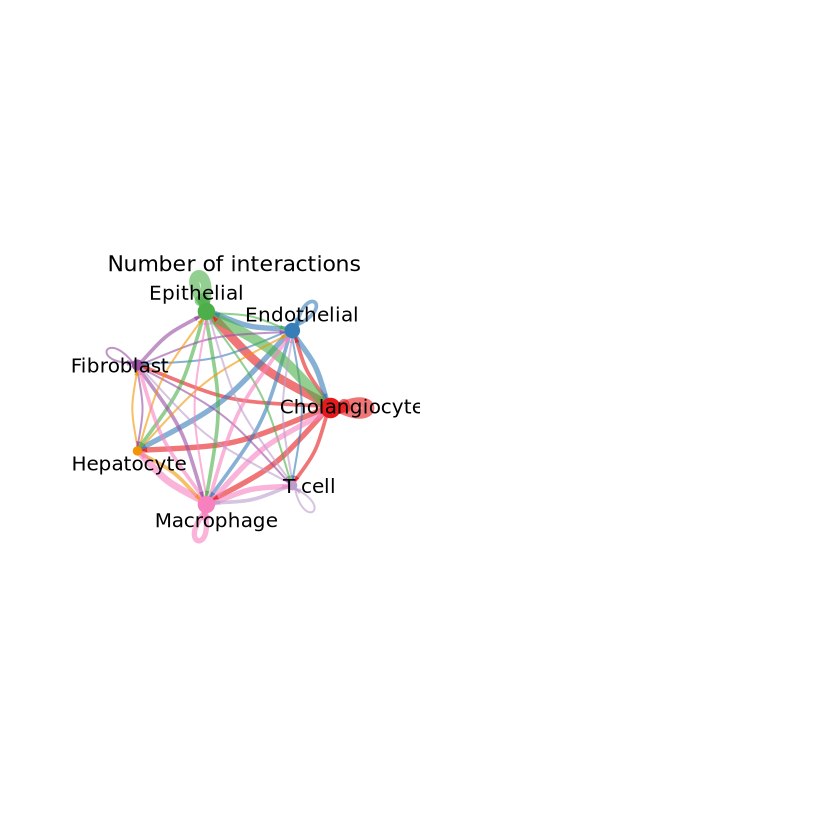

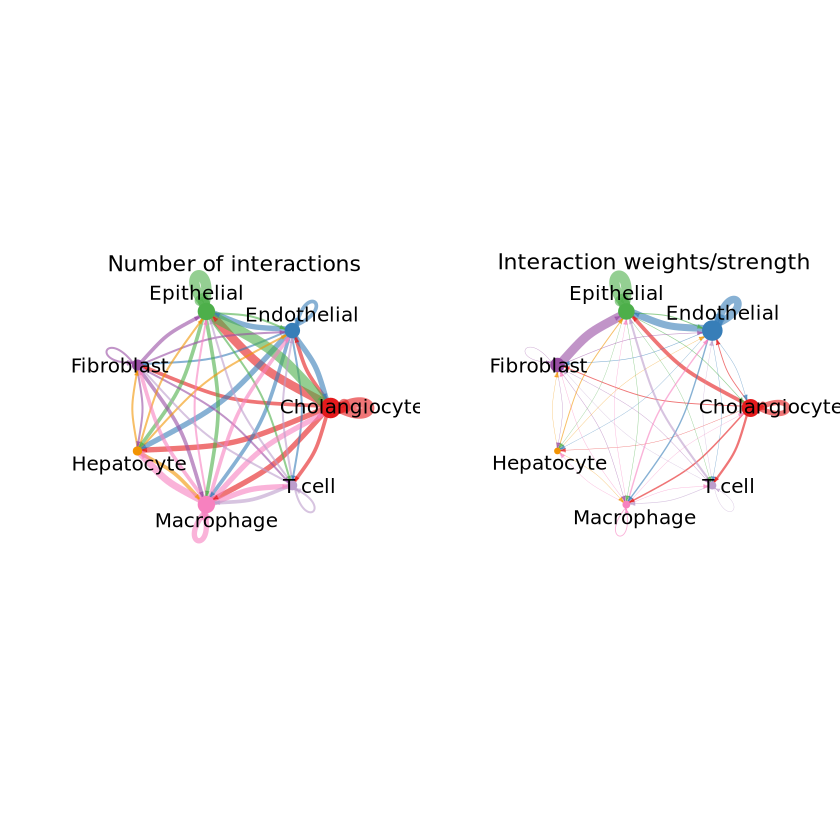

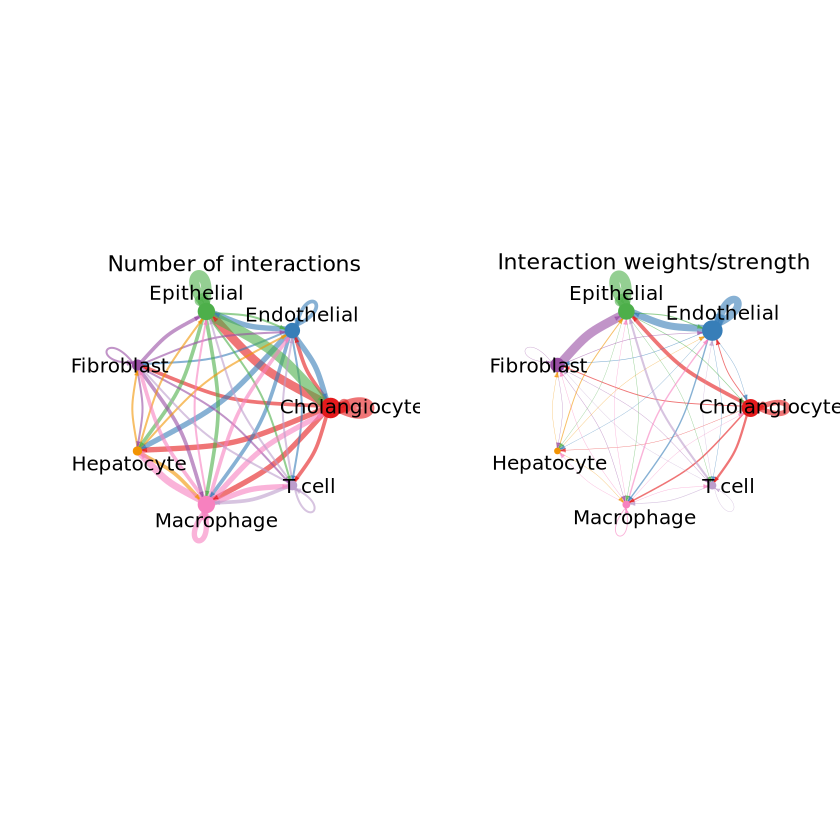

In [5]:
groupSize <- as.numeric(table(xenium@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(xenium@net$count, vertex.weight = rowSums(xenium@net$count), weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(xenium@net$weight, vertex.weight = rowSums(xenium@net$weight), weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

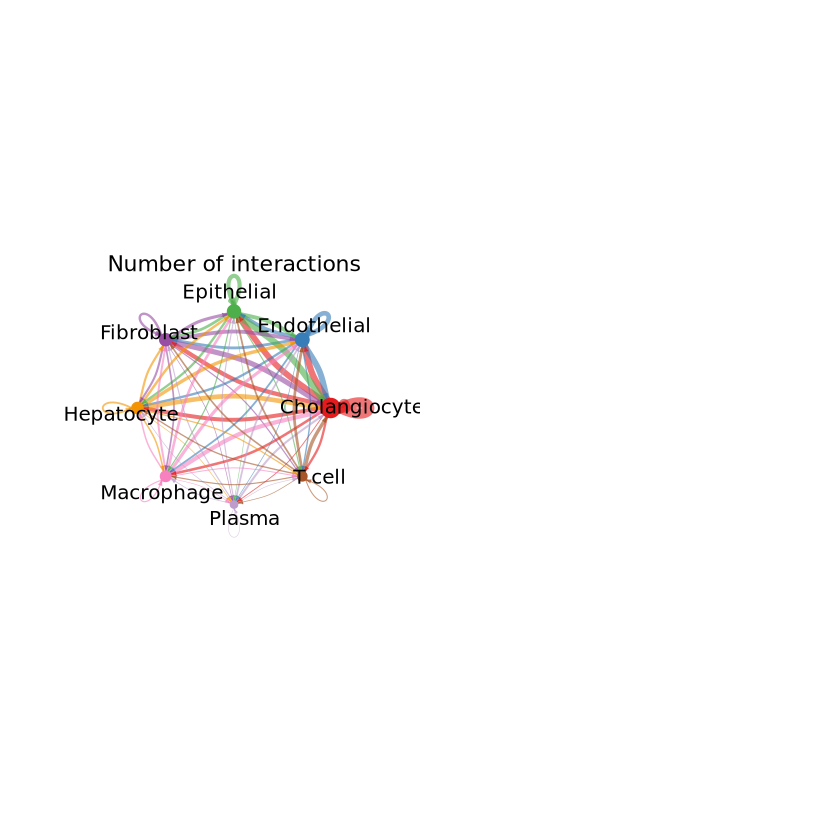

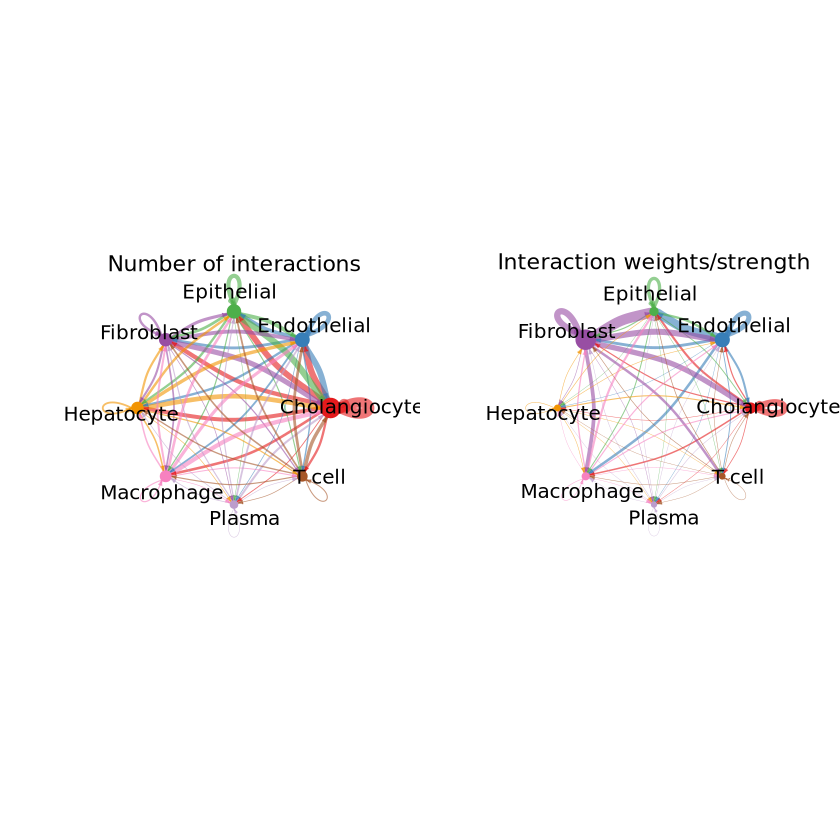

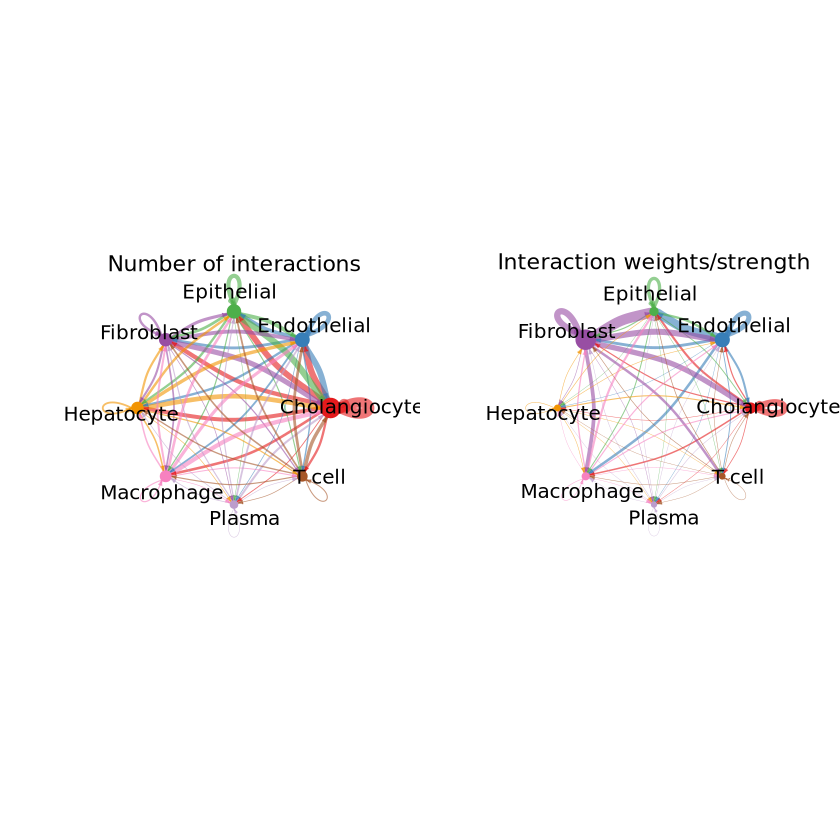

In [6]:
groupSize <- as.numeric(table(cosmx@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cosmx@net$count, vertex.weight = rowSums(cosmx@net$count), weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cosmx@net$weight, vertex.weight = rowSums(cosmx@net$weight), weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

Do heatmap based on a single object 




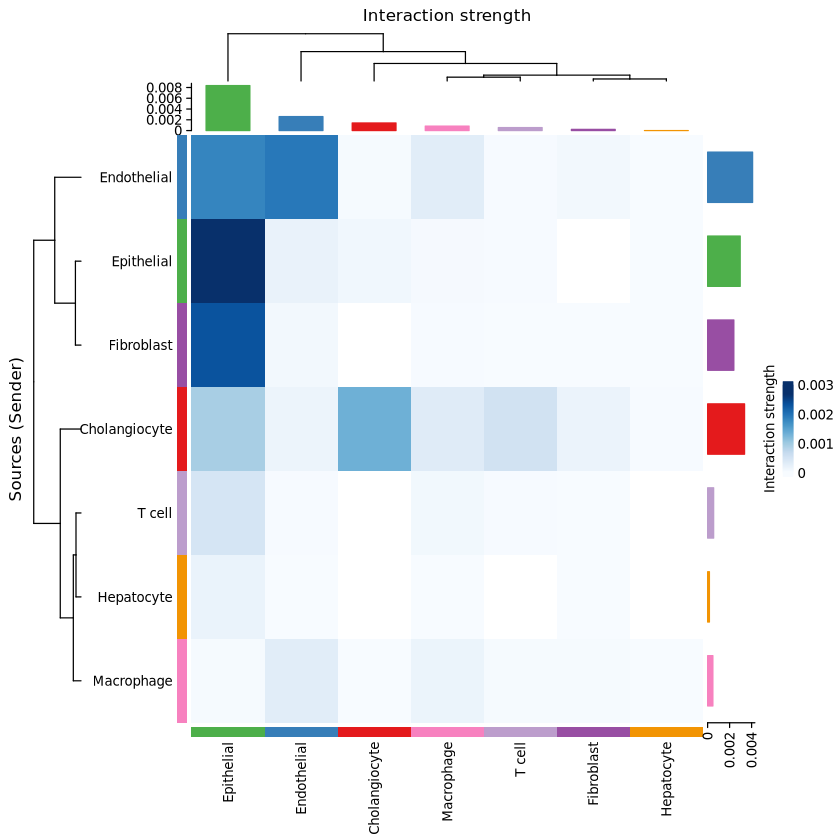

In [7]:
netVisual_heatmap(xenium, measure = "weight", color.heatmap = "Blues", cluster.rows=T, cluster.cols=T)

Do heatmap based on a single object 




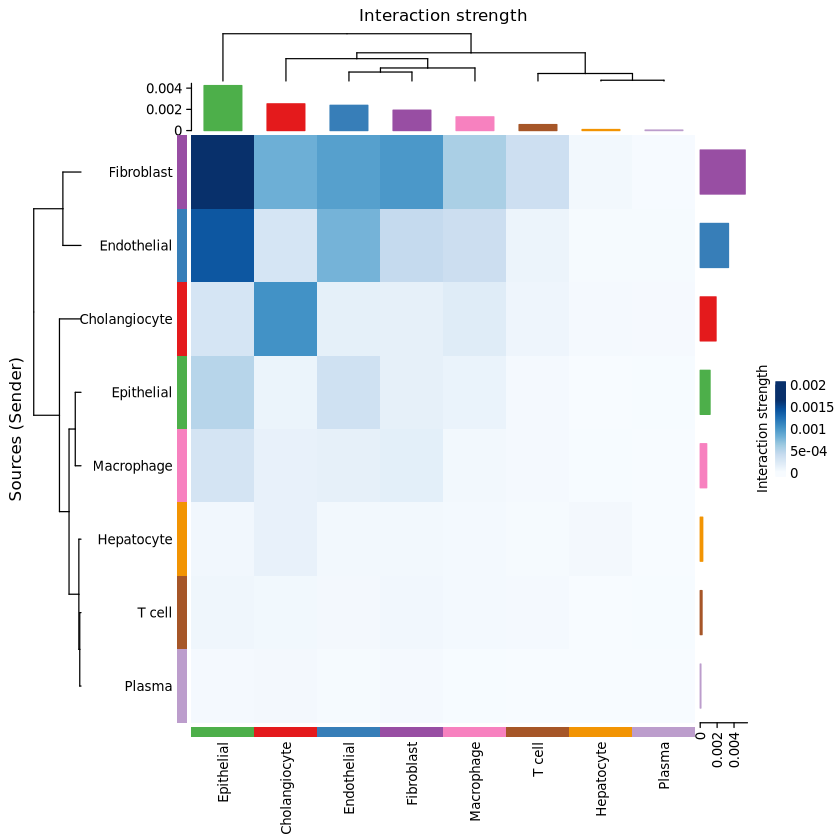

In [8]:
netVisual_heatmap(cosmx, measure = "weight", color.heatmap = "Blues", cluster.rows=T, cluster.cols=T)

In [9]:
df.net <- subsetCommunication(xenium)
head(df.net)

source        target        ligand receptor prob         pval
1 Cholangiocyte Cholangiocyte AREG   EGFR     1.343436e-06 0   
2 Endothelial   Cholangiocyte AREG   EGFR     4.017096e-08 0   
3 Epithelial    Cholangiocyte AREG   EGFR     1.608515e-07 0   
4 Macrophage    Cholangiocyte AREG   EGFR     2.653589e-07 0   
5 Cholangiocyte Hepatocyte    AREG   EGFR     2.176427e-07 0   
6 Endothelial   Hepatocyte    AREG   EGFR     1.832243e-08 0   
  interaction_name interaction_name_2 pathway_name annotation        
1 AREG_EGFR        AREG - EGFR        EGF          Secreted Signaling
2 AREG_EGFR        AREG - EGFR        EGF          Secreted Signaling
3 AREG_EGFR        AREG - EGFR        EGF          Secreted Signaling
4 AREG_EGFR        AREG - EGFR        EGF          Secreted Signaling
5 AREG_EGFR        AREG - EGFR        EGF          Secreted Signaling
6 AREG_EGFR        AREG - EGFR        EGF          Secreted Signaling
  evidence      
1 KEGG: hsa04012
2 KEGG: hsa04012
3 KEGG: hsa04012
4 KEGG: hsa04012
5 KEGG: hsa04012
6 KEGG: hsa04012

In [10]:
unique(df.net$interaction_name)

[1] AREG_EGFR       AREG_EGFR_ERBB2 SPP1_CD44       KITL_KIT       
 [5] FN1_CD44        LAMC2_CD44      PTPRC_MRC1      CD86_CTLA4     
 [9] CDH1_CDH1       CLEC2C_KLRB1    EFNB2_EPHB4     NCAM1_NCAM1    
[13] PECAM1_PECAM1  
26 Levels: AREG_EGFR AREG_EGFR_ERBB2 CCL27_CCR2 CCL19_CCR7 ... SELL_CD34

In [11]:
unique(df.net$pathway_name)

[1] "EGF"     "SPP1"    "KIT"     "FN1"     "LAMININ" "CD45"    "CD86"   
 [8] "CDH"     "CLEC"    "EPHB"    "NCAM"    "PECAM1"

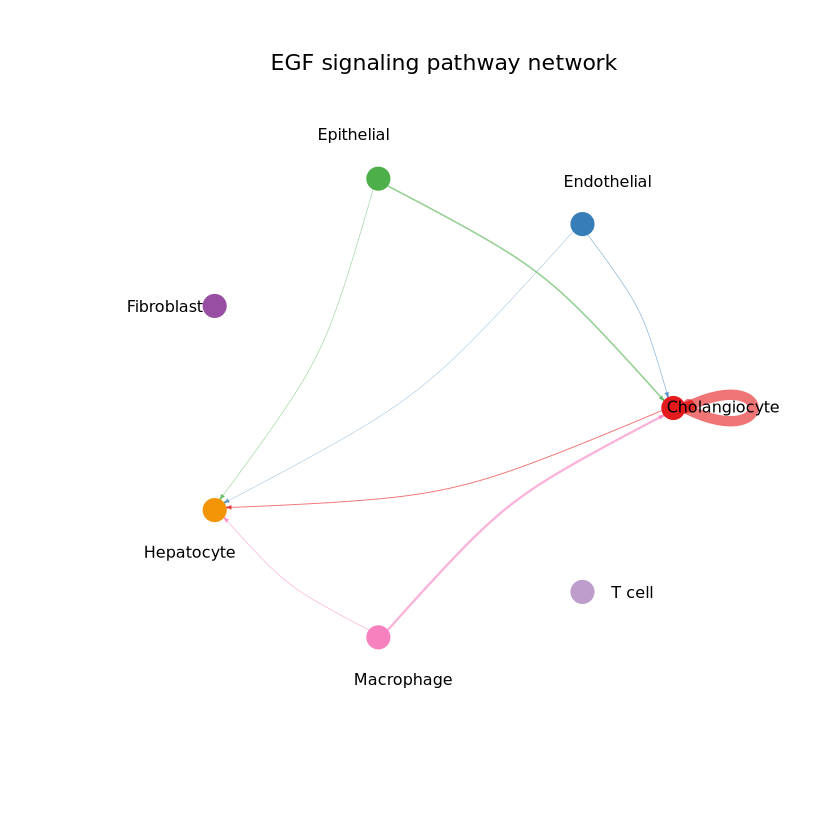

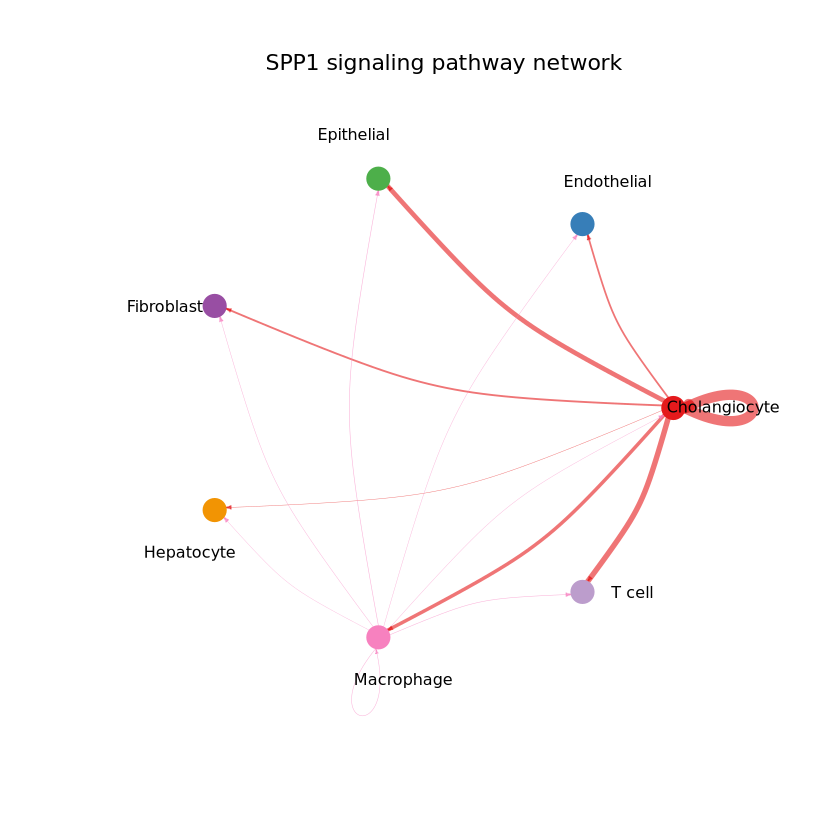

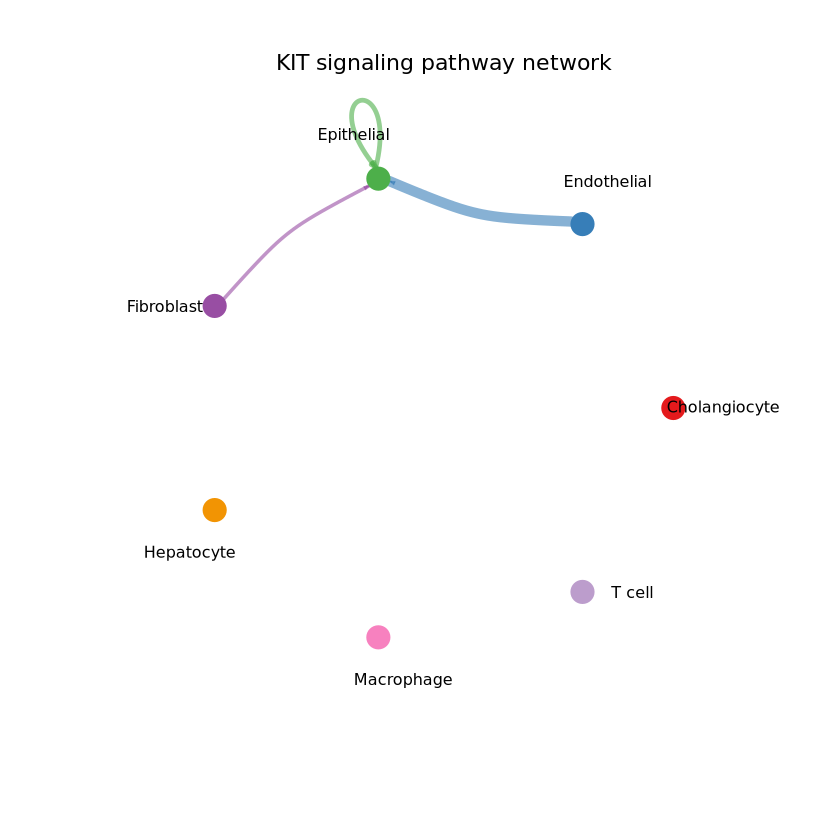

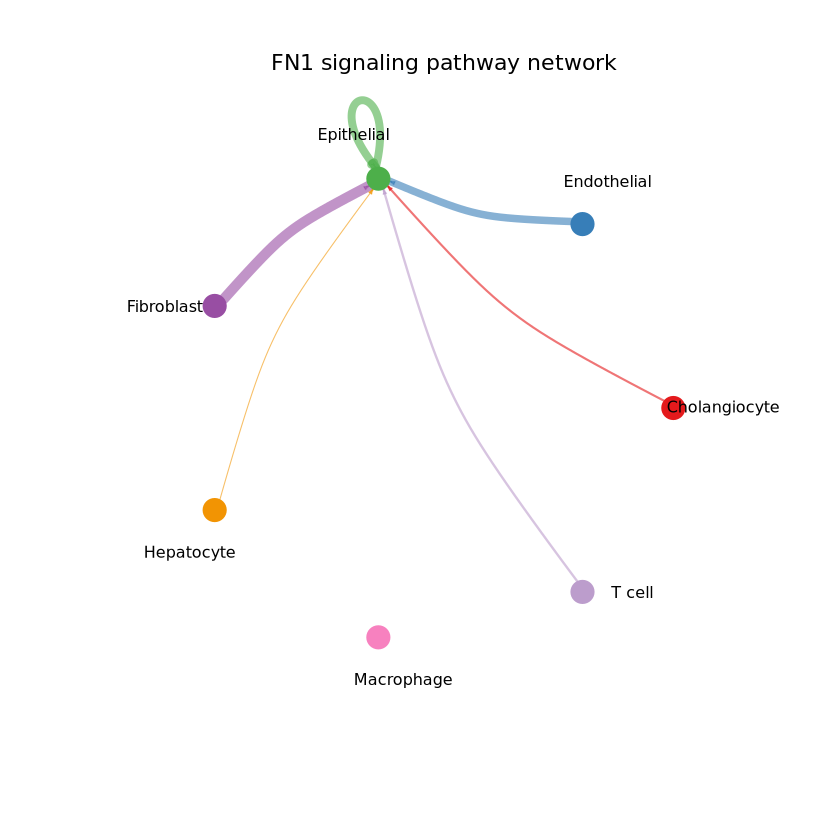

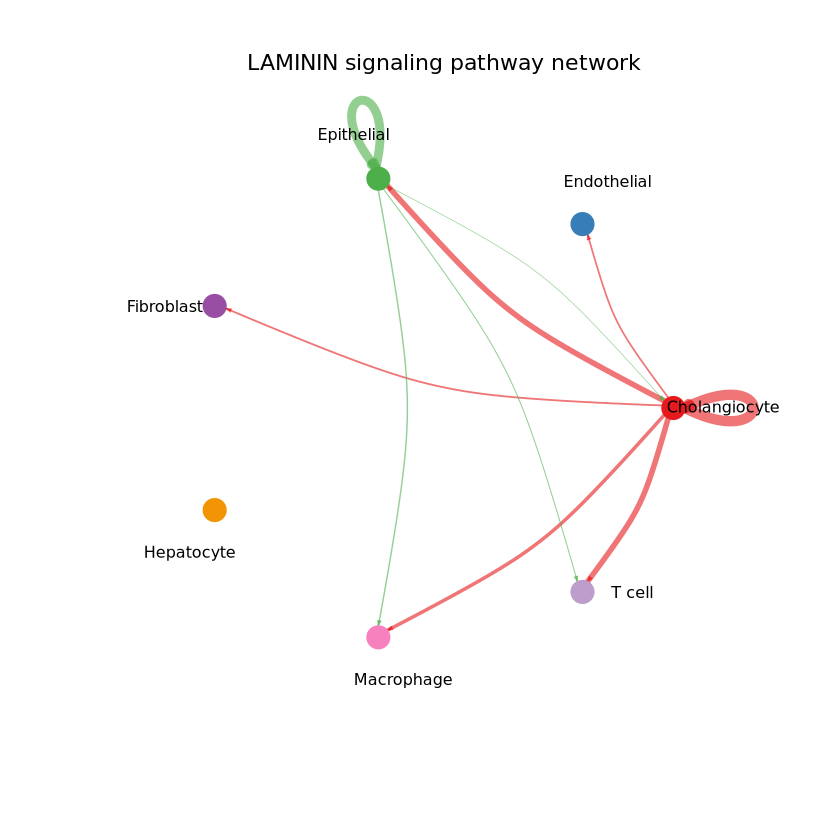

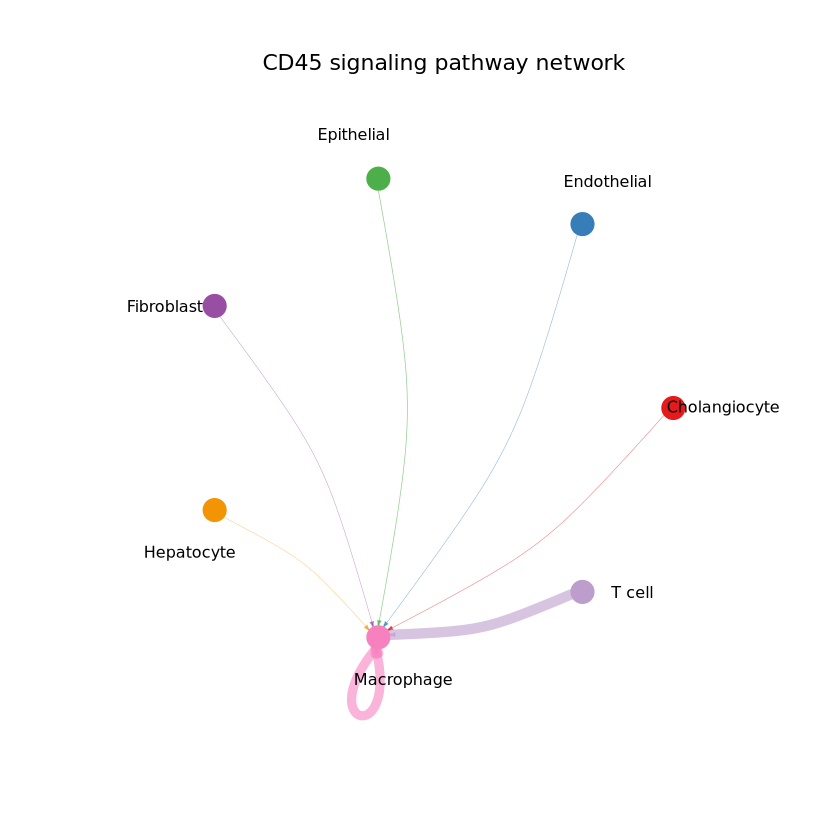

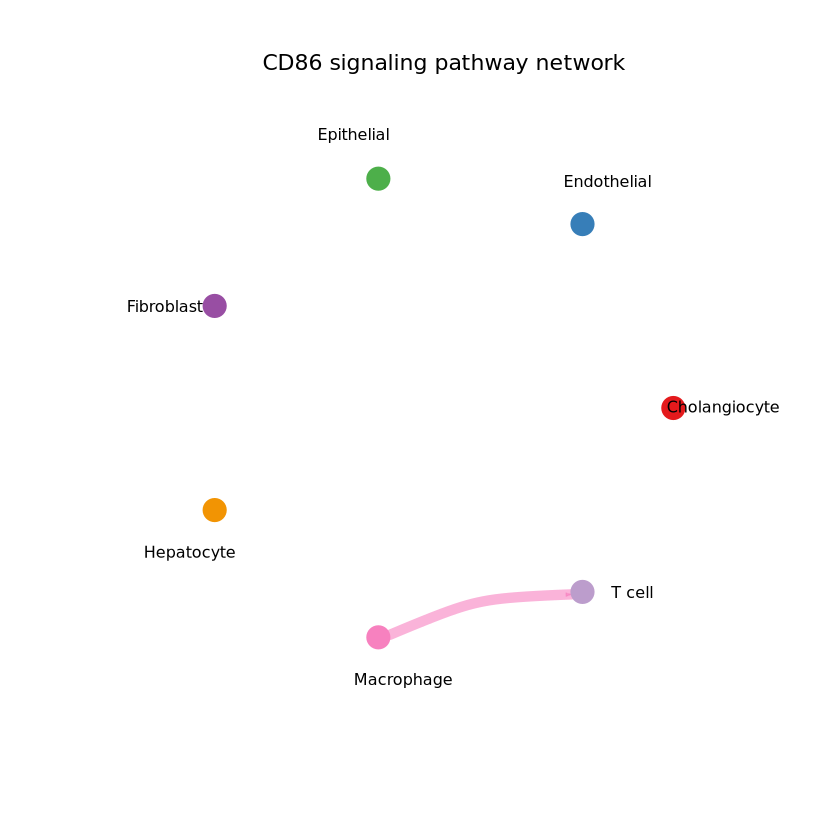

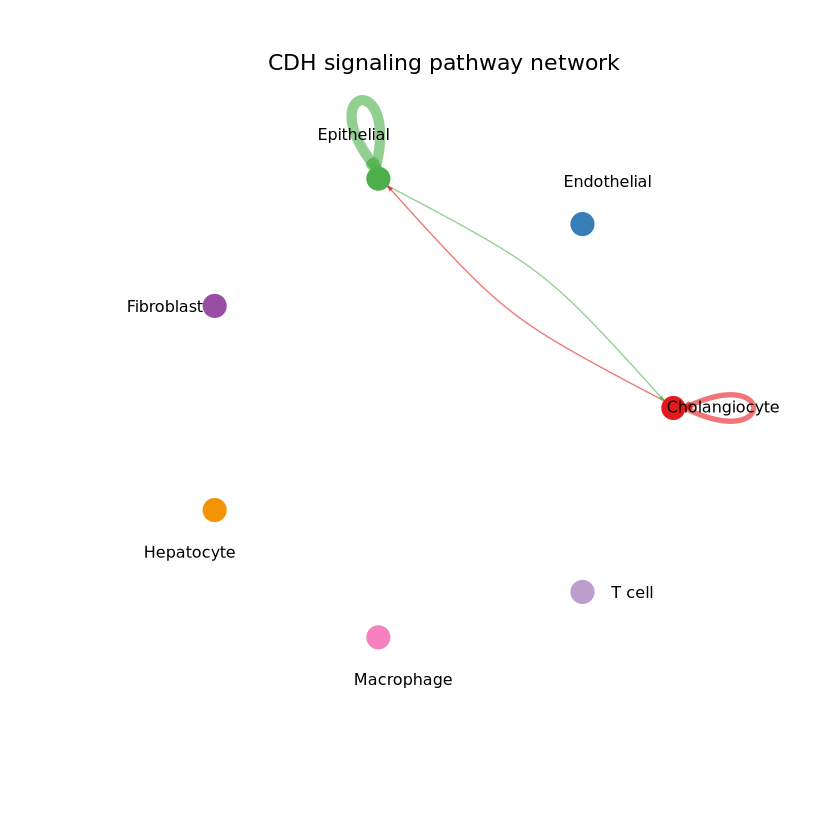

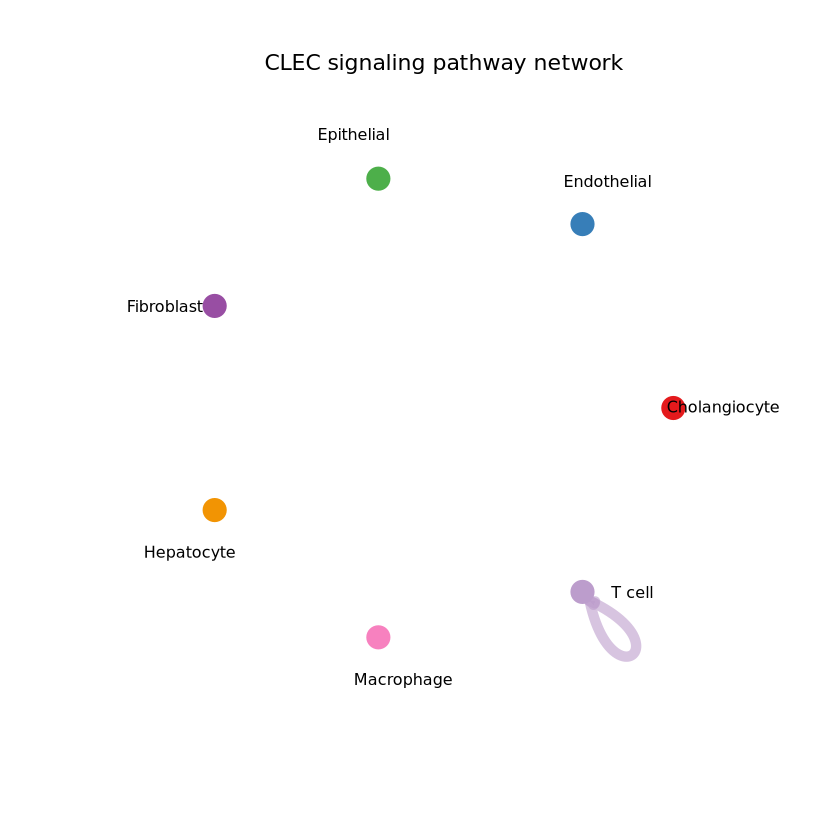

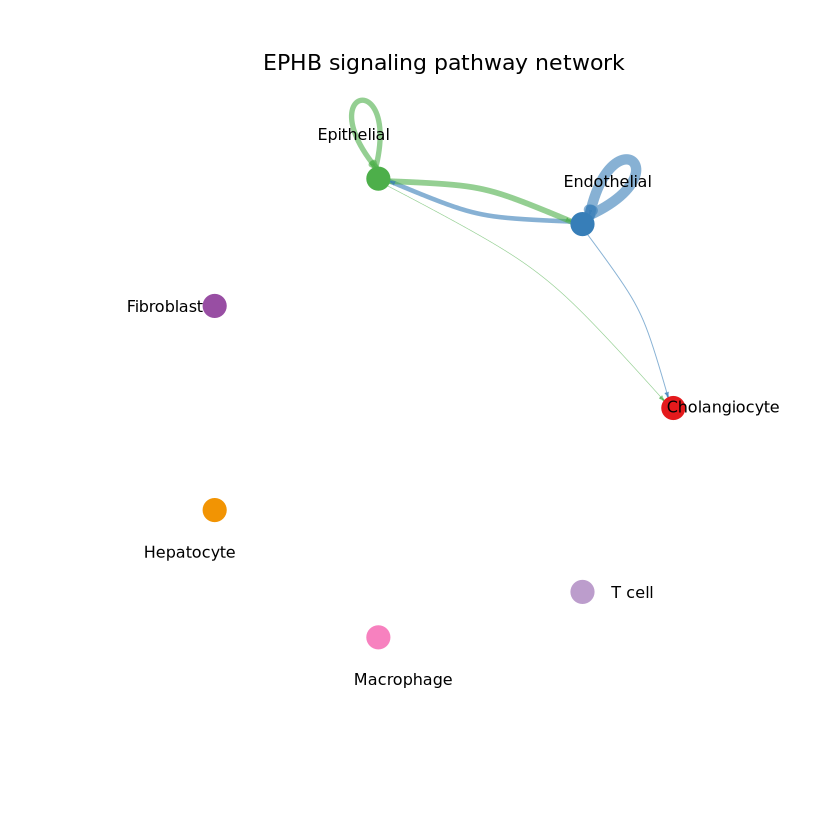

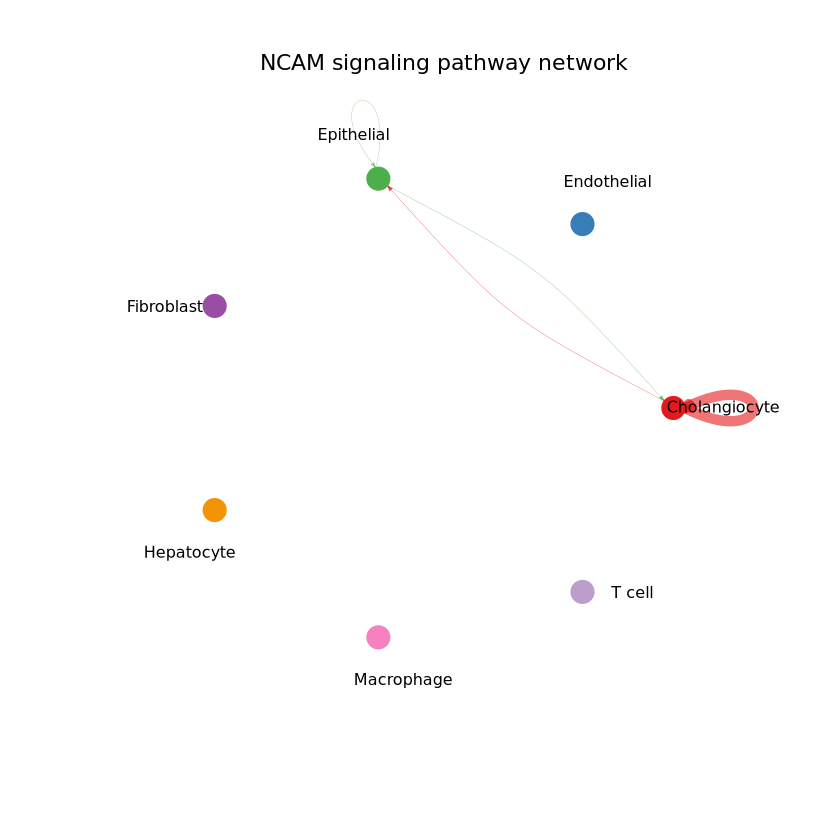

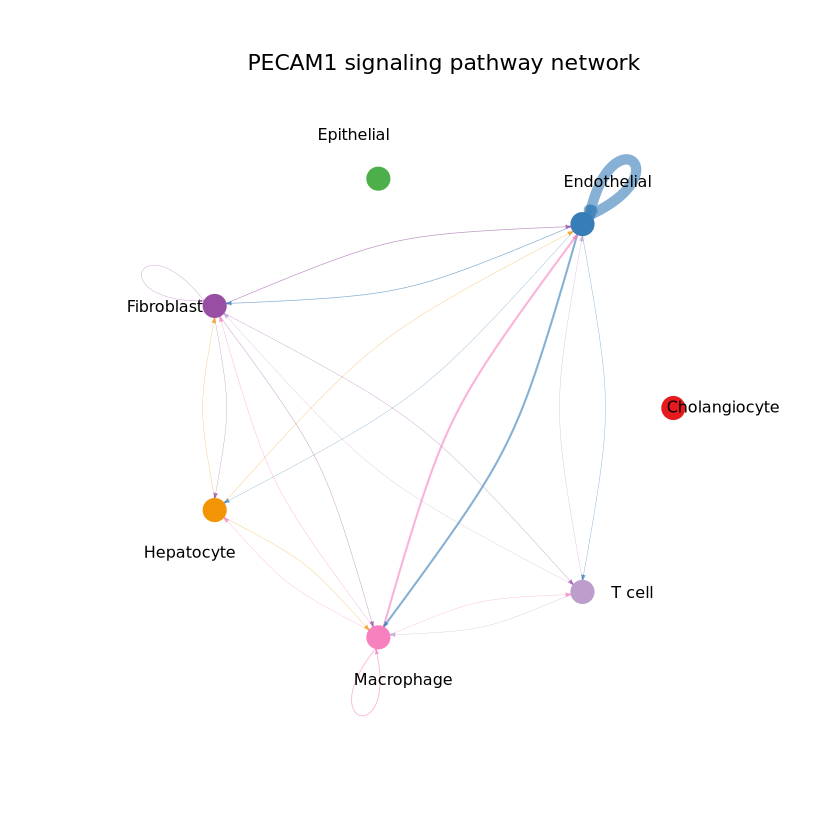

In [12]:
for (pathway in unique(df.net$pathway_name)) {
    par(mfrow=c(1,1), xpd = TRUE) # `xpd = TRUE` should be added to show the title
    netVisual_aggregate(xenium, signaling = c(pathway), layout = "circle")
}


In [21]:
pdf(file = "/data/estorrs/sandbox/fn1.pdf")
par(mfrow=c(1,1), xpd = TRUE) # `xpd = TRUE` should be added to show the title
p = netVisual_aggregate(xenium, signaling = c("FN1"), layout = "circle")
dev.off()

png 
  2

In [23]:
pdf(file = "/data/estorrs/sandbox/fn1_heatmap.pdf")
netAnalysis_signalingRole_network(xenium, signaling = c("FN1"), width = 8, height = 2.5, font.size = 10)
dev.off()

png 
  2

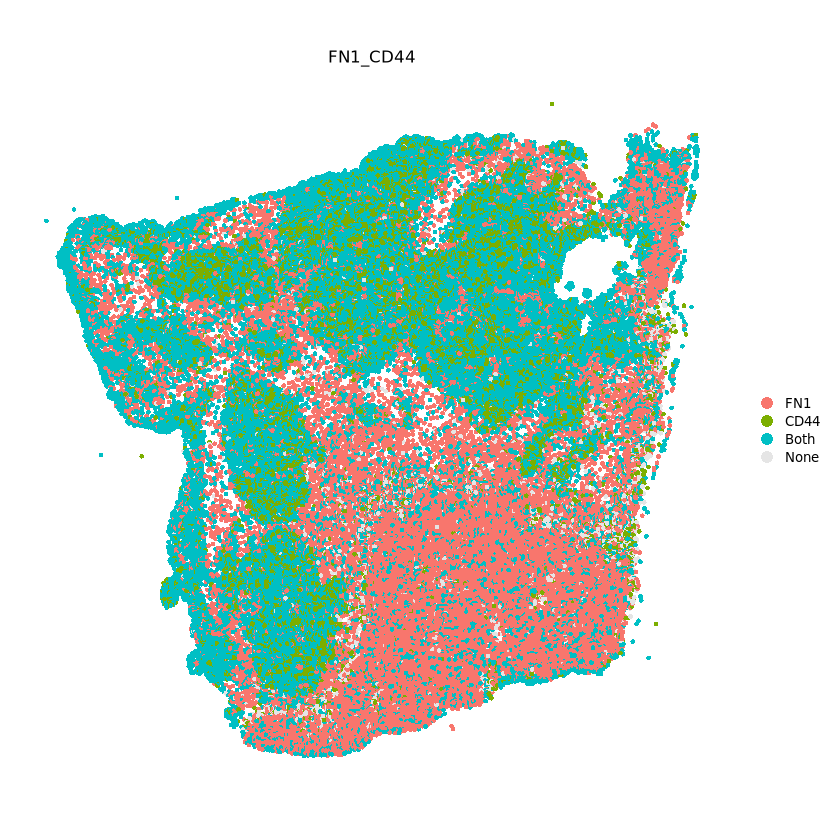

In [26]:
spatialFeaturePlot(xenium, pairLR.use = "FN1_CD44", point.size = 1, do.binary = TRUE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1, sample.use = "HT413C1-Th1k4A1-U9")





In [25]:
unique(xenium@meta$samples)

[1] HT413C1-Th1k4A1-U19 HT413C1-Th1k4A1-U2  HT413C1-Th1k4A1-U9 
[4] HT413C1-Th1k4A1-U25 HT413C1-Th1k4A1-U36
5 Levels: HT413C1-Th1k4A1-U19 HT413C1-Th1k4A1-U2 ... HT413C1-Th1k4A1-U9

In [17]:
df.net <- subsetCommunication(cosmx)
head(df.net)

source        target        ligand receptor  prob         pval
1 Cholangiocyte Cholangiocyte TGFB1  TGFbR1_R2 1.250843e-06 0   
2 Endothelial   Cholangiocyte TGFB1  TGFbR1_R2 9.002353e-07 0   
3 Fibroblast    Cholangiocyte TGFB1  TGFbR1_R2 4.074197e-07 0   
4 Macrophage    Cholangiocyte TGFB1  TGFbR1_R2 2.934877e-07 0   
5 T cell        Cholangiocyte TGFB1  TGFbR1_R2 1.509812e-07 0   
6 Cholangiocyte Endothelial   TGFB1  TGFbR1_R2 4.333955e-08 0   
  interaction_name    interaction_name_2      pathway_name annotation        
1 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2) TGFb         Secreted Signaling
2 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2) TGFb         Secreted Signaling
3 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2) TGFb         Secreted Signaling
4 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2) TGFb         Secreted Signaling
5 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2) TGFb         Secreted Signaling
6 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2) TGFb         Secreted Signaling
  evidence      
1 KEGG: hsa04350
2 KEGG: hsa04350
3 KEGG: hsa04350
4 KEGG: hsa04350
5 KEGG: hsa04350
6 KEGG: hsa04350

In [18]:
unique(df.net$interaction_name)

[1] TGFB1_TGFBR1_TGFBR2   TGFB2_TGFBR1_TGFBR2   TGFB3_TGFBR1_TGFBR2  
  [4] TGFB1_ACVR1B_TGFBR2   TGFB2_ACVR1B_TGFBR2   TGFB3_ACVR1B_TGFBR2  
  [7] TGFB1_ACVR1_TGFBR1    TGFB2_ACVR1_TGFBR1    TGFB3_ACVR1_TGFBR1   
 [10] BMP2_BMPR1A_ACVR2A    BMP2_BMPR1A_BMPR2     BMP4_BMPR1A_ACVR2A   
 [13] BMP4_BMPR1A_BMPR2     BMP7_ACVR1_ACVR2A     BMP7_ACVR1_BMPR2     
 [16] BMP7_BMPR1A_ACVR2A    BMP7_BMPR1A_BMPR2     GDF15_TGFBR2         
 [19] INHBA_ACVR1B_ACVR2A   INHBB_ACVR1B_ACVR2A   INHBABB_ACVR1B_ACVR2A
 [22] INHABA_ACVR2A         WNT5A_FZD1            WNT5A_FZD3           
 [25] WNT5A_FZD4            WNT5A_FZD5            WNT5A_FZD6           
 [28] WNT5A_FZD7            WNT5A_FZD8            WNT5B_FZD1           
 [31] WNT5B_FZD3            WNT5B_FZD4            WNT5B_FZD5           
 [34] WNT5B_FZD6            WNT5B_FZD7            WNT5B_FZD8           
 [37] WNT11_FZD1            WNT11_FZD3            WNT11_FZD4           
 [40] WNT11_FZD5            WNT11_FZD6            WNT11_FZD7           
 [43] WNT11_FZD8            EGF_EGFR              EGF_EGFR_ERBB2       
 [46] AREG_EGFR             AREG_EGFR_ERBB2       FGF1_FGFR1           
 [49] FGF1_FGFR2            FGF1_FGFR3            FGF2_FGFR1           
 [52] FGF2_FGFR2            FGF2_FGFR3            FGF18_FGFR1          
 [55] FGF18_FGFR2           FGF18_FGFR3           FGF9_FGFR1           
 [58] FGF9_FGFR2            FGF9_FGFR3            PDGFA_PDGFRA         
 [61] PDGFA_PDGFRB          PDGFB_PDGFRA          PDGFB_PDGFRB         
 [64] PDGFC_PDGFRA          VEGFA_VEGFR1          VEGFA_VEGFR2         
 [67] VEGFB_VEGFR1          VEGFC_VEGFR2          PGF_VEGFR1           
 [70] VEGFA_VEGFR1R2        IGF2_IGF2R            IGF1_ITGA6_ITGB4     
 [73] IGF2_ITGA6_ITGB4      INS_INSSR             CCL5_CCR1            
 [76] CCL8_CCR1             CCL15_CCR1            CCL8_CCR2            
 [79] CCL2_CCR2             CCL5_CCR5             CCL19_CCR7           
 [82] CCL21_CCR7            CCL19_ACKR4           CCL21_ACKR4          
 [85] CCL28_CCR10           CCL8_ACKR4            CCL2_ACKR1           
 [88] CCL5_ACKR1            CCL8_ACKR1            CCL18_ACKR1          
 [91] CXCL5_ACKR1           CXCL8_ACKR1           CXCL9_ACKR1          
 [94] CXCL10_ACKR1          CXCL13_ACKR1          CCL11_ACKR1          
 [97] CCL17_ACKR1           CXCL5_CXCR1           CXCL8_CXCR1          
[100] CXCL5_CXCR2           CXCL8_CXCR2           CXCL9_CXCR3          
[103] CXCL10_CXCR3          CXCL13_CXCR3          CXCL12_CXCR4         
[106] CXCL12_ACKR3          CXCL13_CXCR5          CXCL16_CXCR6         
[109] MIF_CD74_CXCR4        MIF_CD74_CD44         MIF_CD74_CXCR2       
[112] MIF_ACKR3             CX3CL1_CX3CR1         IL7_IL7R_IL2RG       
[115] CSF2_CSF2RA_CSF2RB    IL6_IL6R_IL6ST        IL11_IL11RA_IL6ST    
[118] OSM_OSMR_IL6ST        IL1A_IL1R1_IL1RAP     IL1B_IL1R1_IL1RAP    
[121] IL1A_IL1R2            IL1B_IL1R2            IL17B_IL17RB         
[124] IL34_CSF1R            CSF1_CSF1R            IL16_CD4             
[127] TNFSF14_LTBR          TNFSF14_TNFRSF14      FASL_FAS             
[130] KLK3_NGFR             TNFSF12_TNFRSF12A     CD70_CD27            
[133] TNFSF9_TNFRSF9        TNFSF4_TNFRSF4        TNFSF13B_TNFRSF17    
[136] SPP1_CD44             SPP1_ITGAV_ITGB1      SPP1_ITGAV_ITGB5     
[139] SPP1_ITGA9_ITGB1      SPP1_ITGA8_ITGB1      SPP1_ITGA5_ITGB1     
[142] ANGPTL1_ITGA1_ITGB1   ANGPT2_TEK            ANGPT2_ITGA5_ITGB1   
[145] NPPC_NPR2             HGF_MET               ANXA1_FPR1           
[148] GAS6_AXL              GAS6_MERTK            LGALS9_CD45          
[151] RARRES2_CMKLR1        LGALS9_CD44           COL1A1_ITGA1_ITGB1   
[154] COL1A2_ITGA1_ITGB1    COL4A1_ITGA1_ITGB1    COL4A2_ITGA1_ITGB1   
[157] COL6A1_ITGA1_ITGB1    COL6A2_ITGA1_ITGB1    COL6A3_ITGA1_ITGB1   
[160] COL9A2_ITGA1_ITGB1    COL9A3_ITGA1_ITGB1    COL1A1_ITGA2_ITGB1   
[163] COL1A2_ITGA2_ITGB1    COL4A1_ITGA2_ITGB1    COL4A2_ITGA2_ITGB1   
[166] COL6A1_ITGA2_ITGB1    COL6A2_ITGA2_I

In [19]:
unique(df.net$pathway_name)

[1] "TGFb"     "BMP"      "GDF"      "ACTIVIN"  "ncWNT"    "EGF"     
 [7] "FGF"      "PDGF"     "VEGF"     "IGF"      "INSULIN"  "CCL"     
[13] "CXCL"     "MIF"      "CX3C"     "IL2"      "IL4"      "IL6"     
[19] "OSM"      "IL1"      "IL17"     "CSF"      "IL16"     "LIGHT"   
[25] "FASLG"    "NGF"      "TWEAK"    "CD70"     "CD137"    "OX40"    
[31] "BAFF"     "SPP1"     "ANGPTL"   "ANGPT"    "NPR2"     "HGF"     
[37] "ANNEXIN"  "GAS"      "GALECTIN" "CHEMERIN" "COLLAGEN" "FN1"     
[43] "LAMININ"  "THBS"     "VTN"      "APP"      "CD45"     "CD80"    
[49] "CDH"      "CDH1"     "CDH5"     "CEACAM"   "CSPG4"    "EPHA"    
[55] "EPHB"     "ESAM"     "ICAM"     "ICOS"     "NCAM"     "NOTCH"   
[61] "PD-L1"    "PECAM1"   "VCAM"     "ADGRE"    "ADGRG"    "ADGRL"   
[67] "PECAM2"

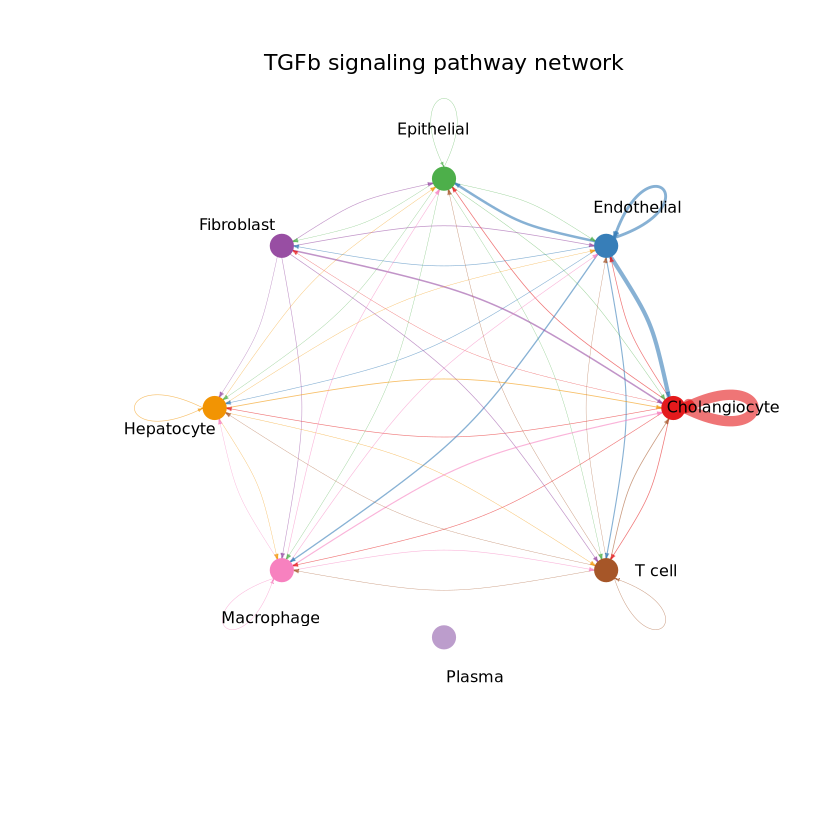

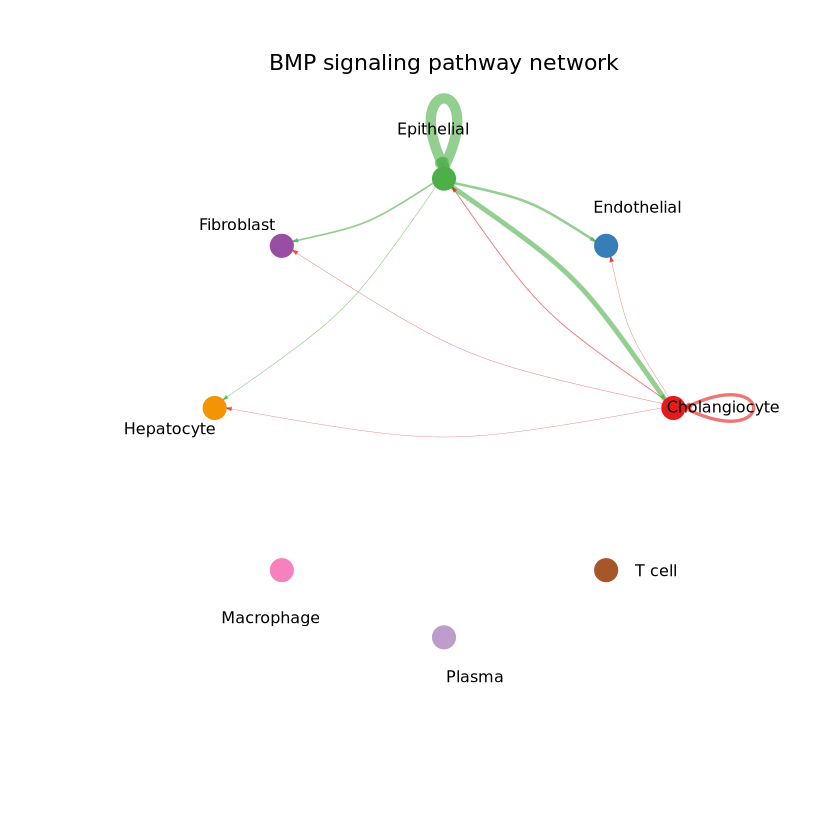

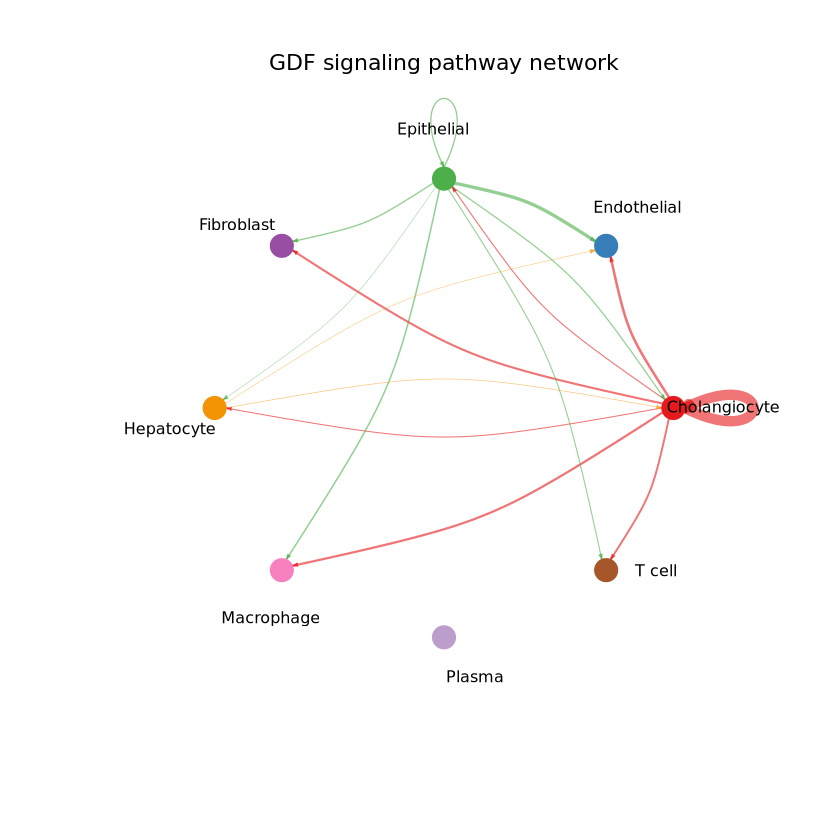

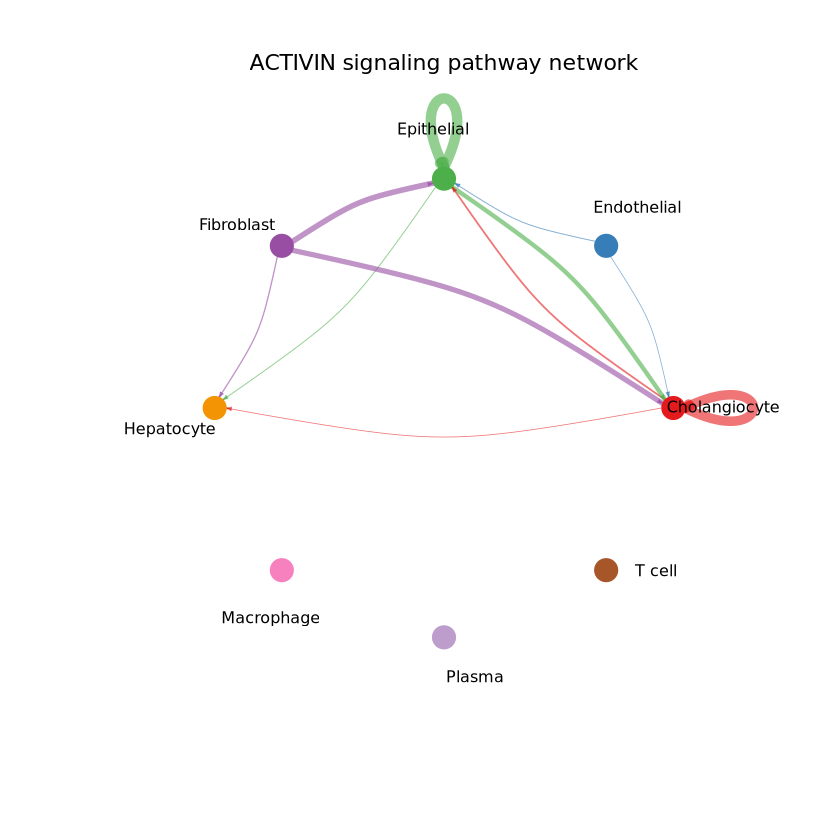

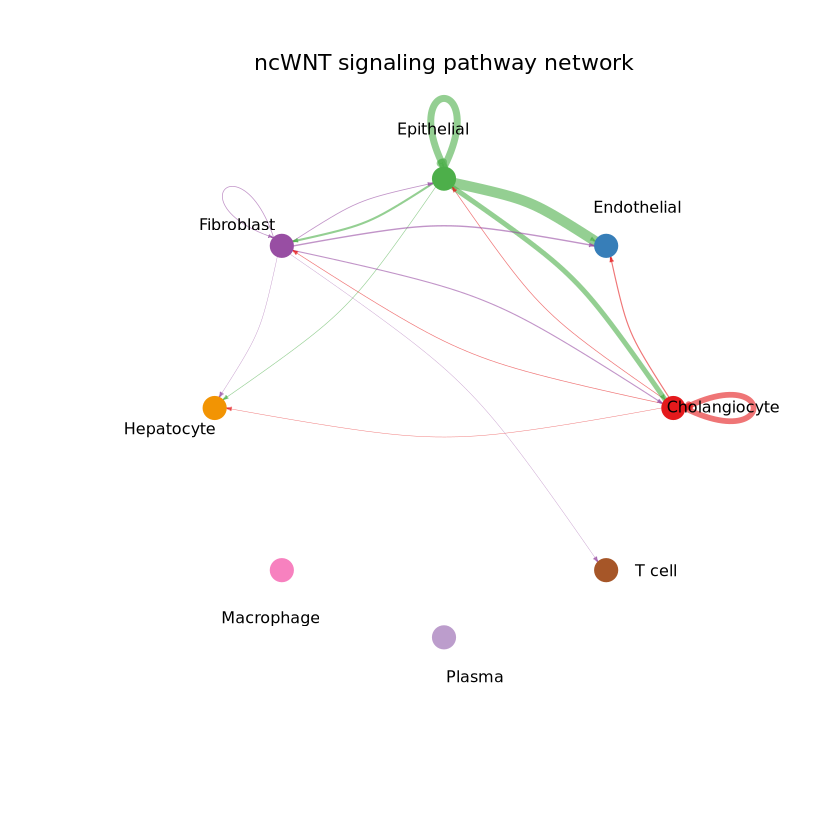

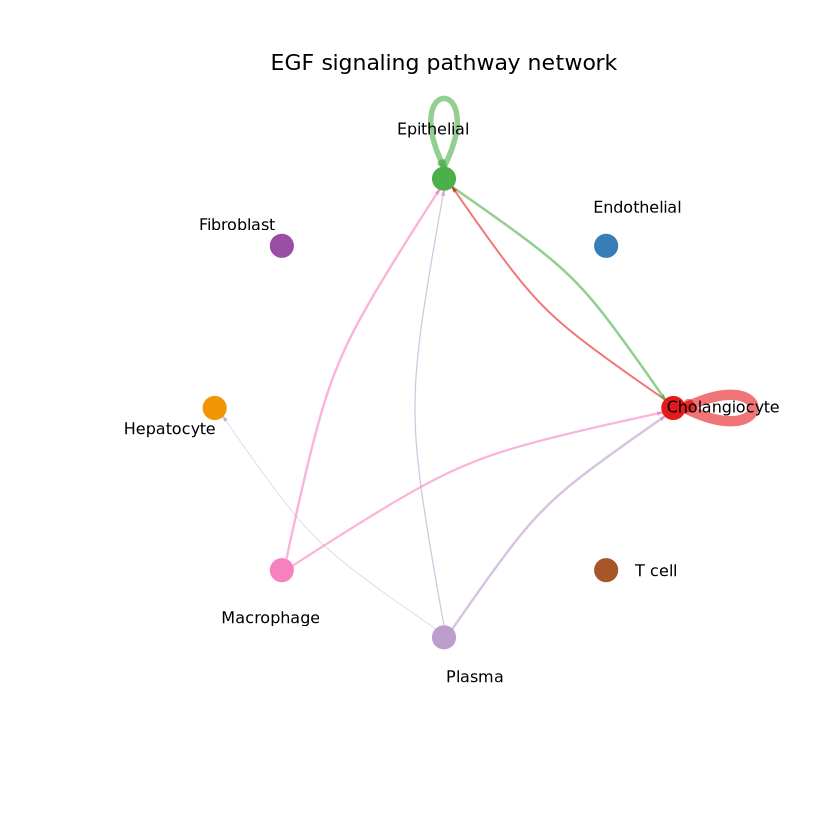

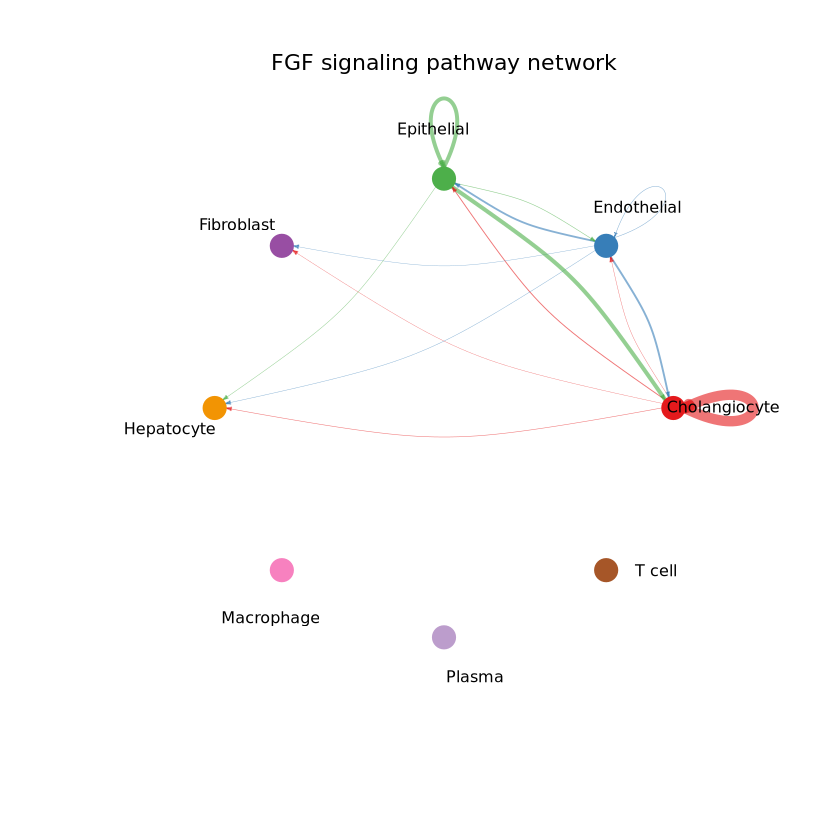

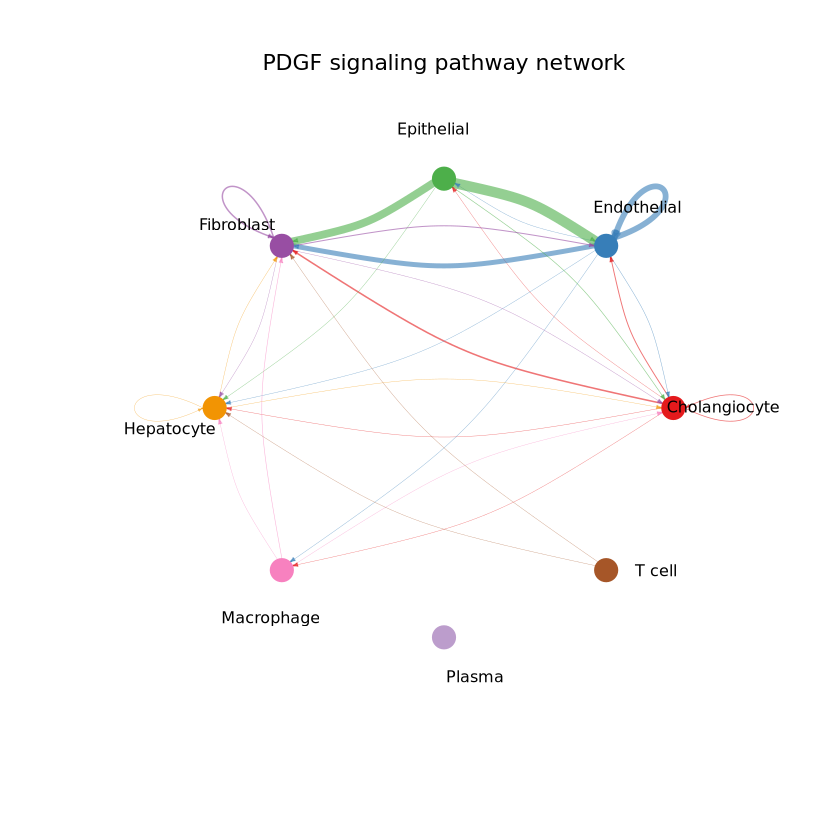

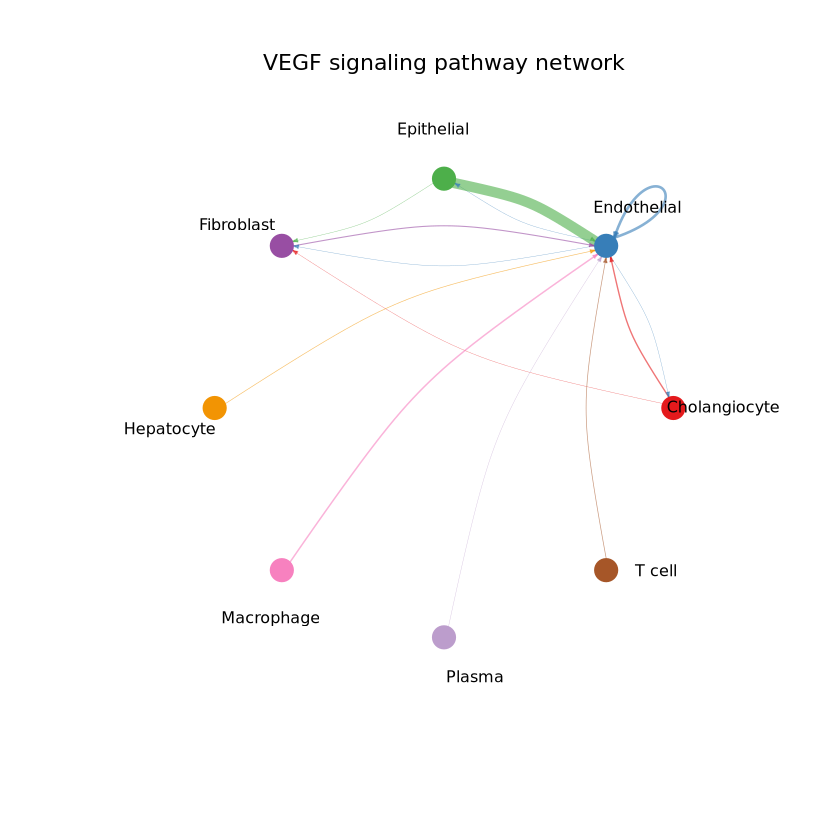

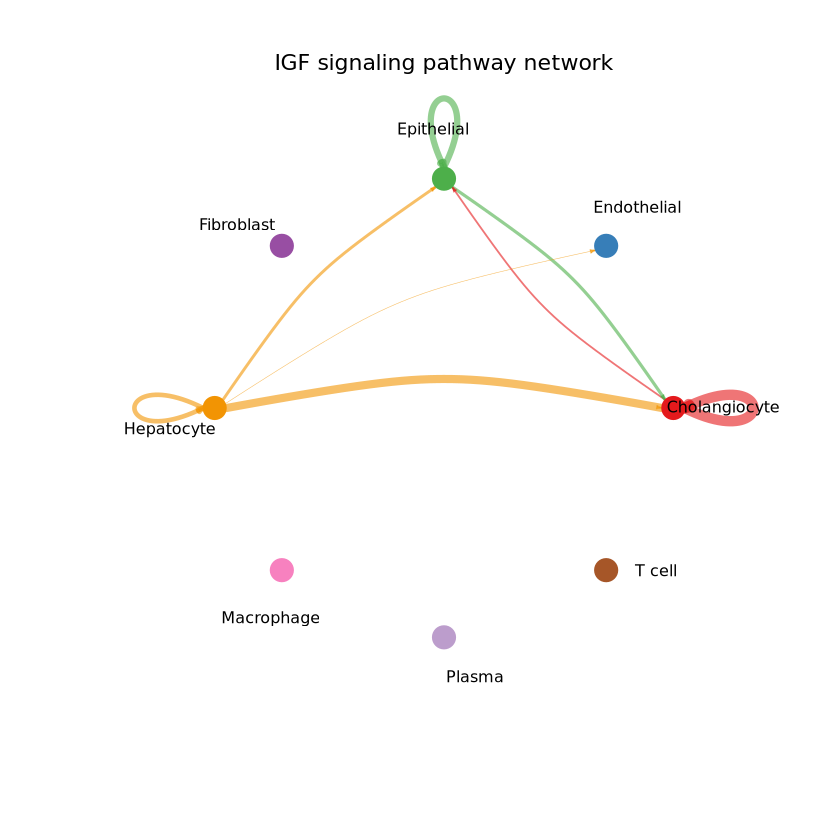

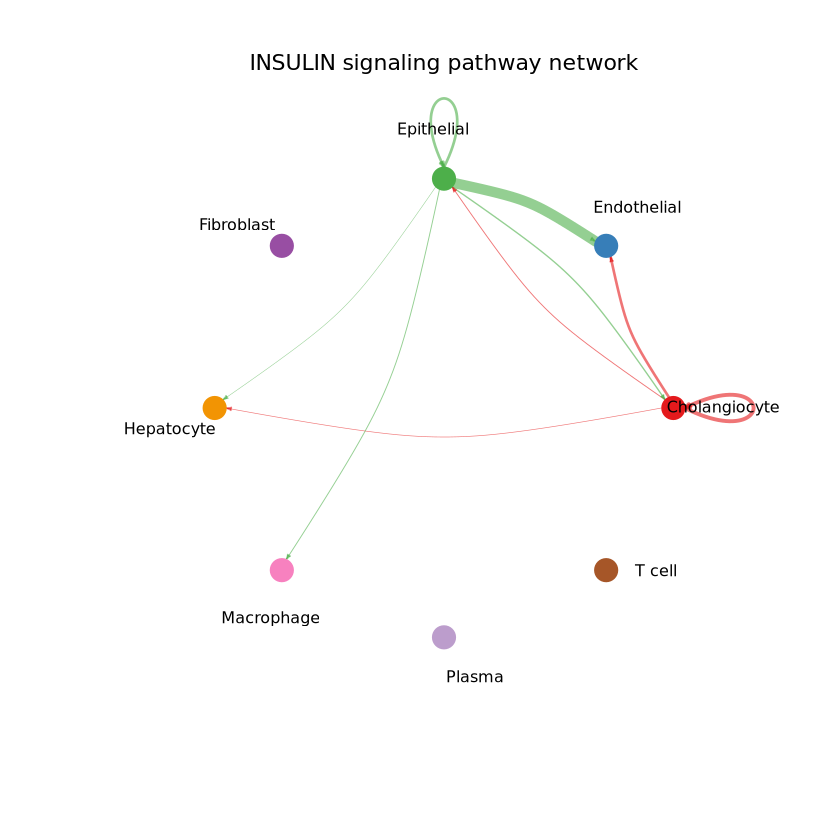

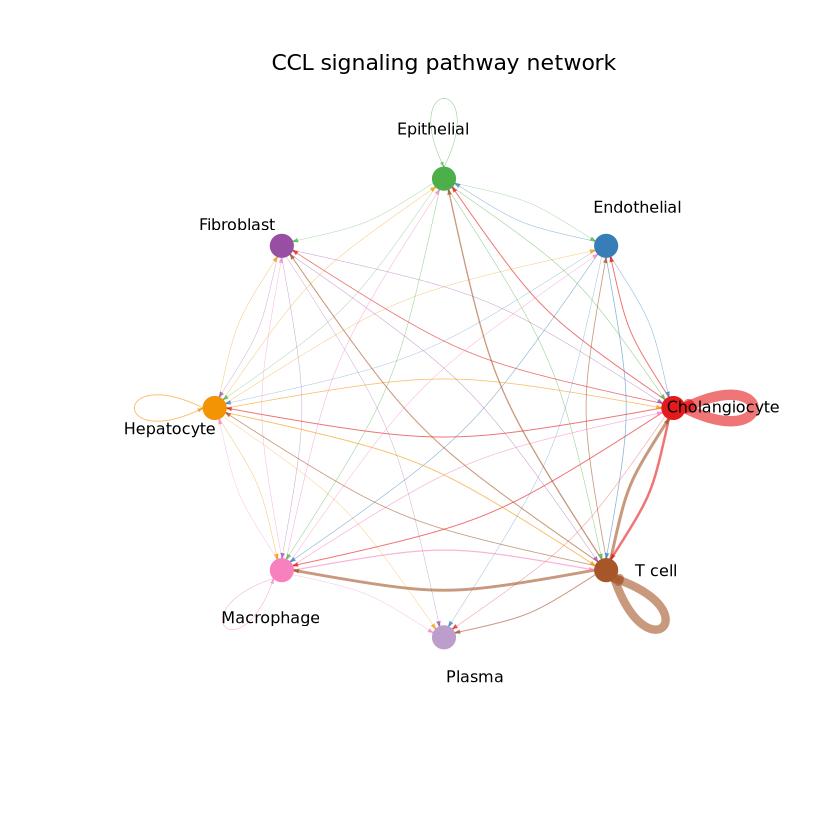

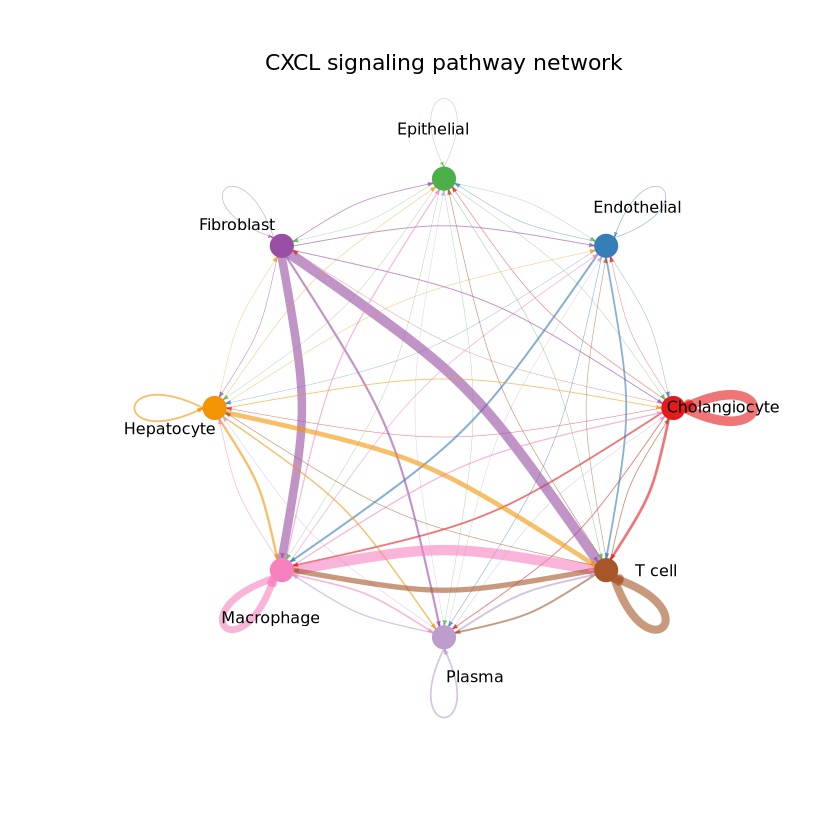

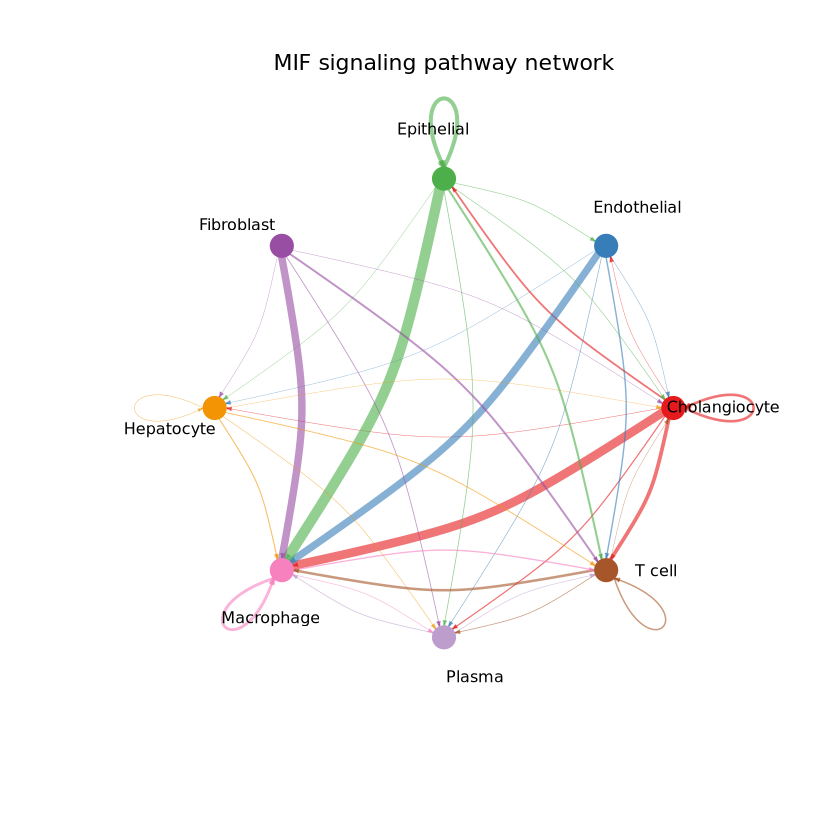

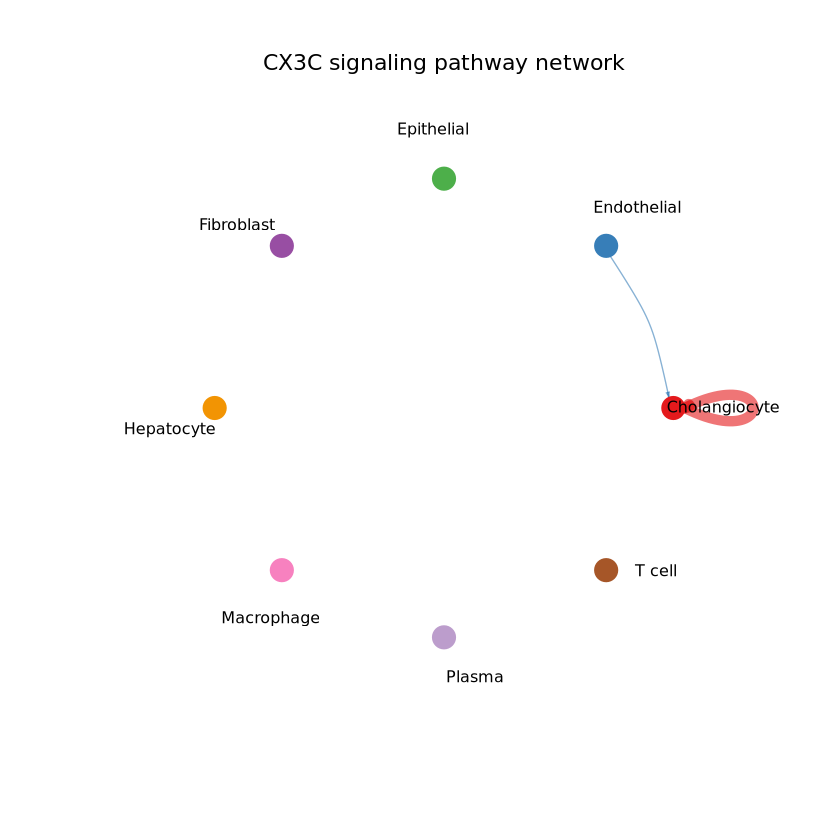

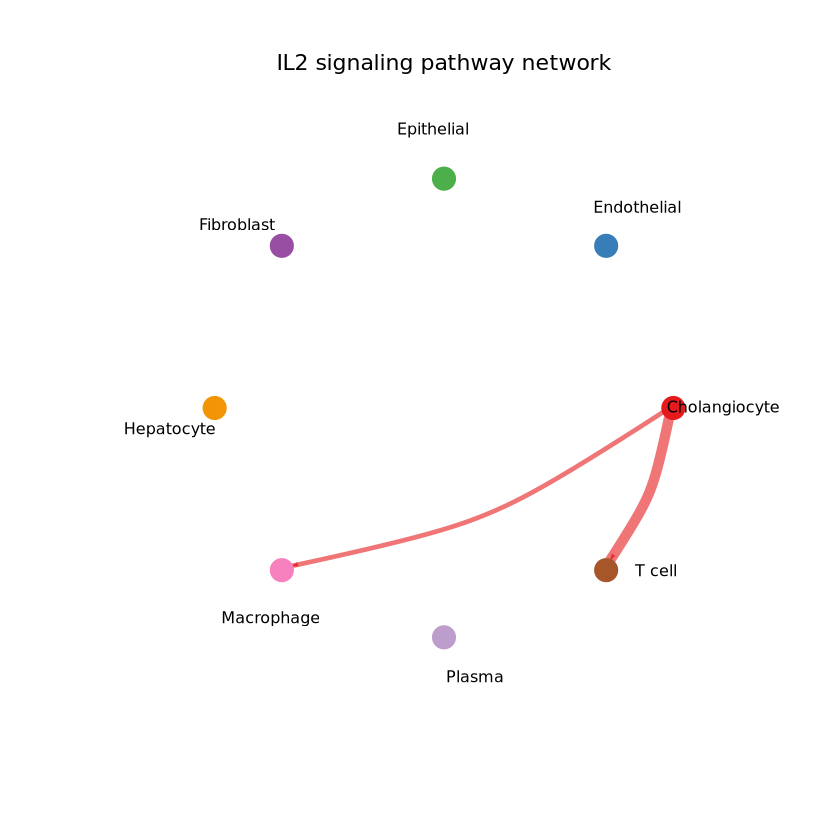

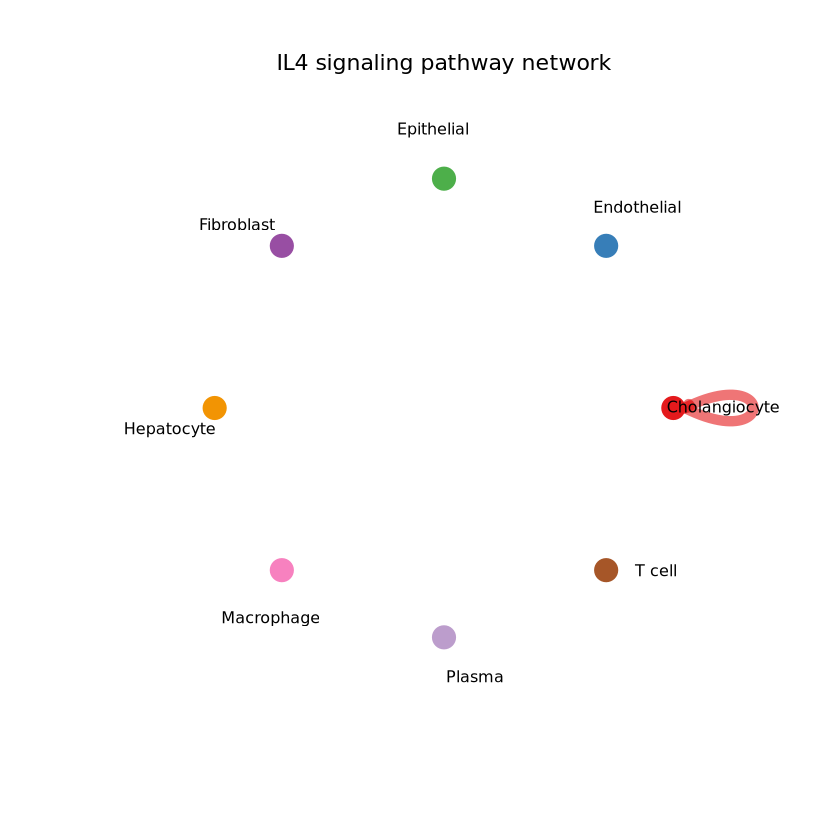

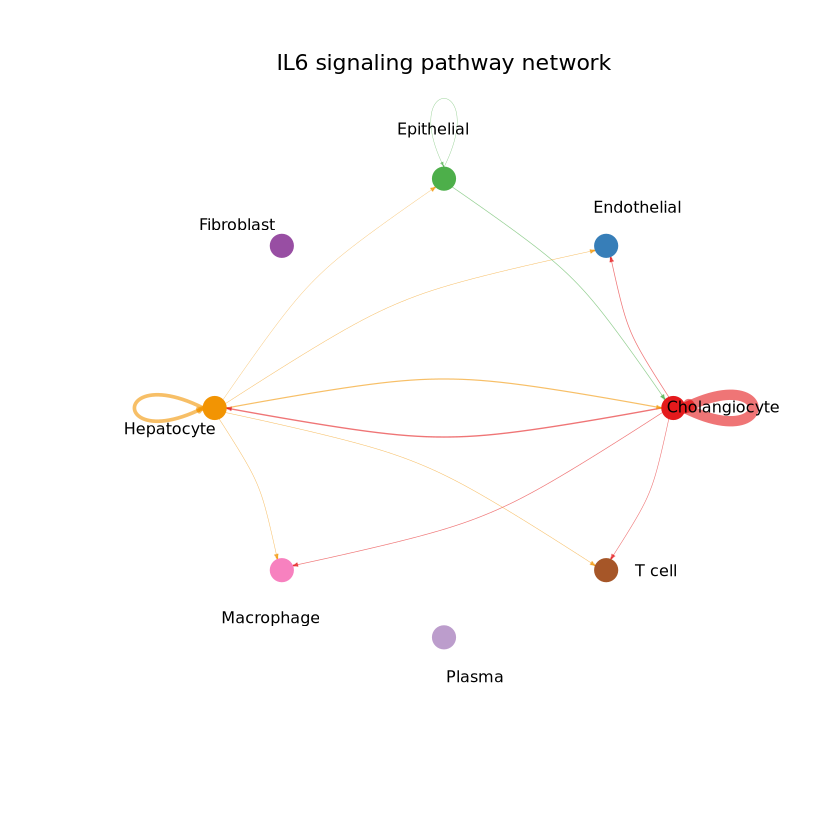

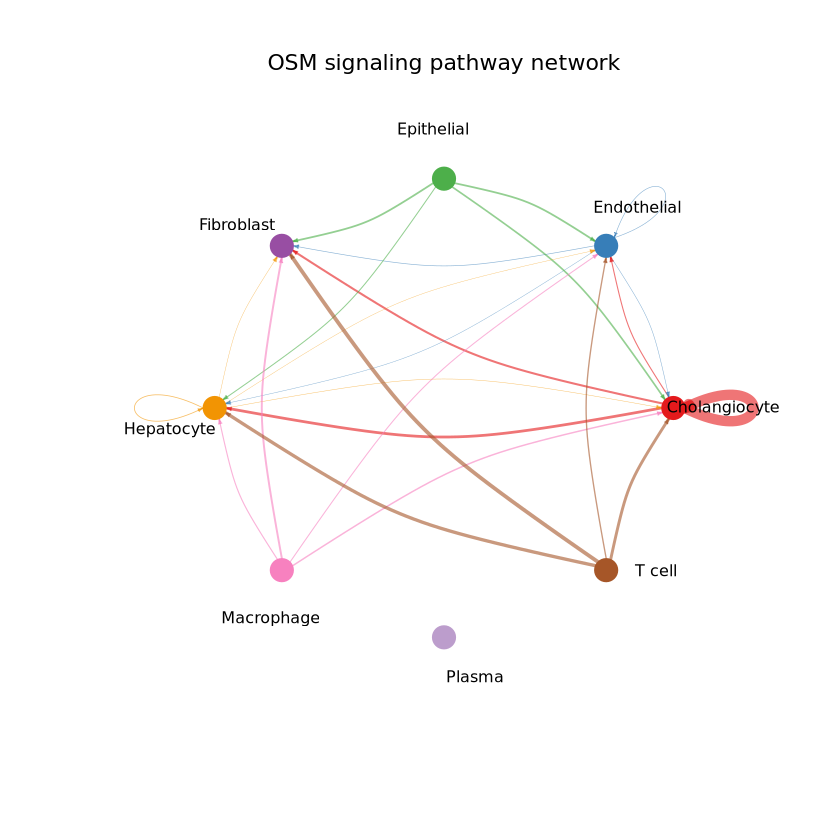

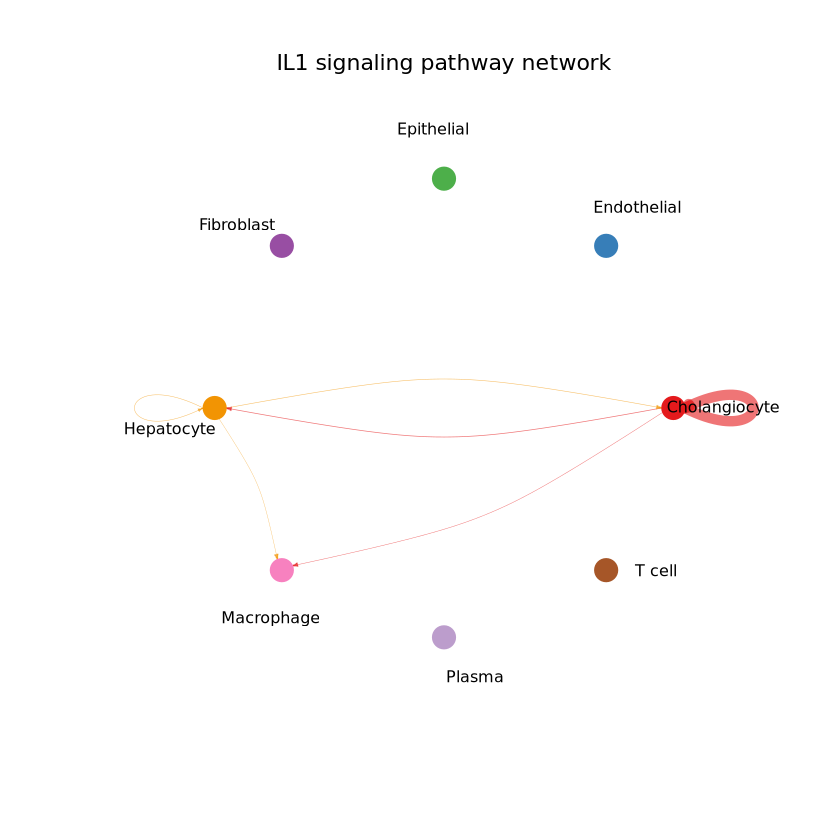

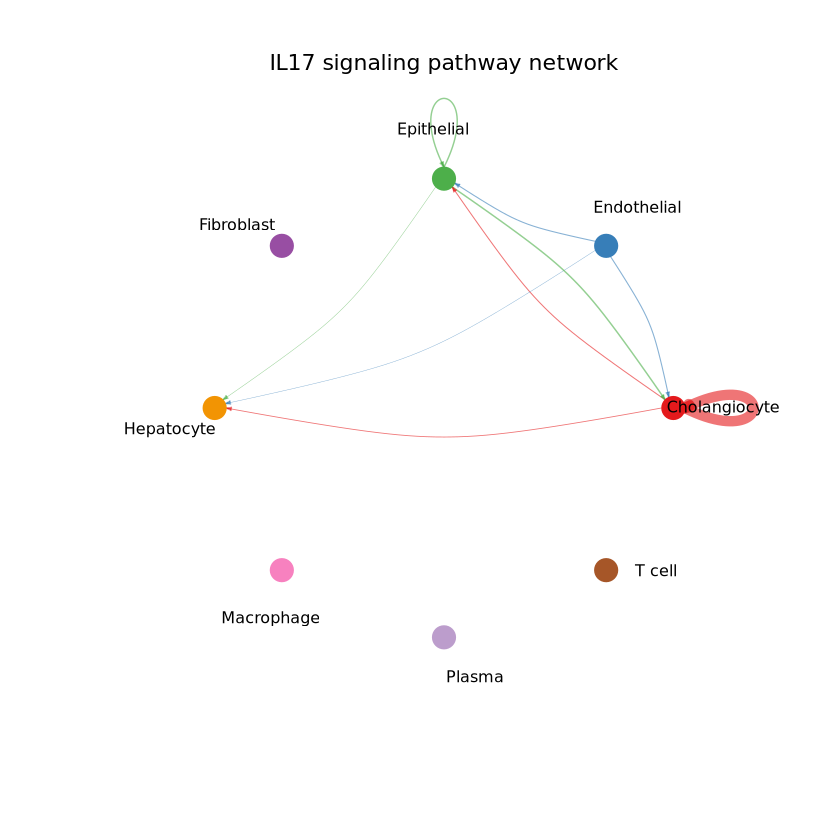

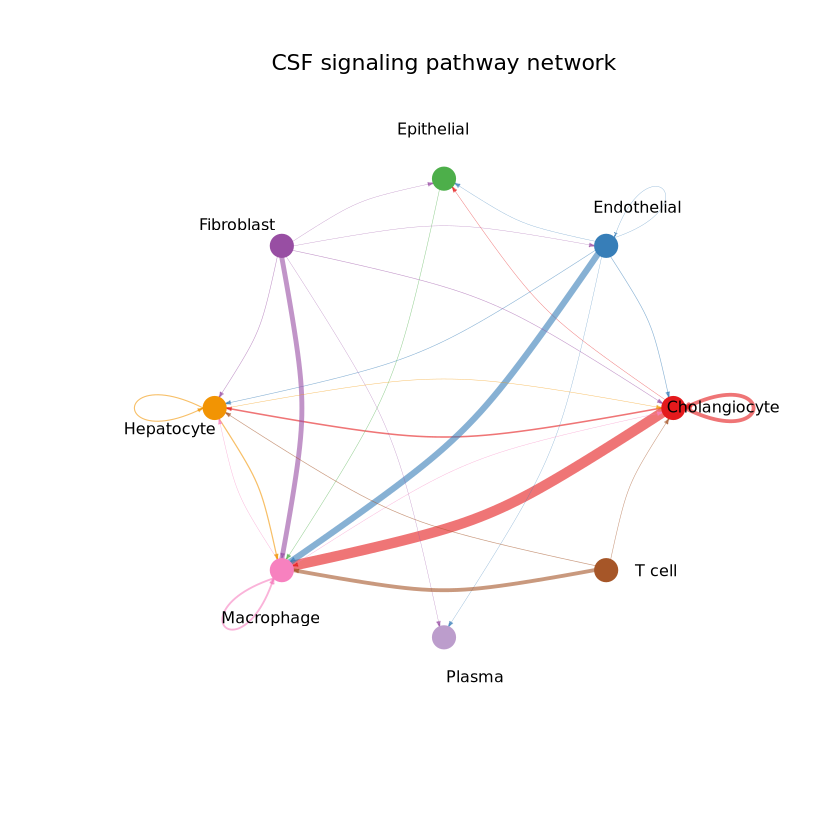

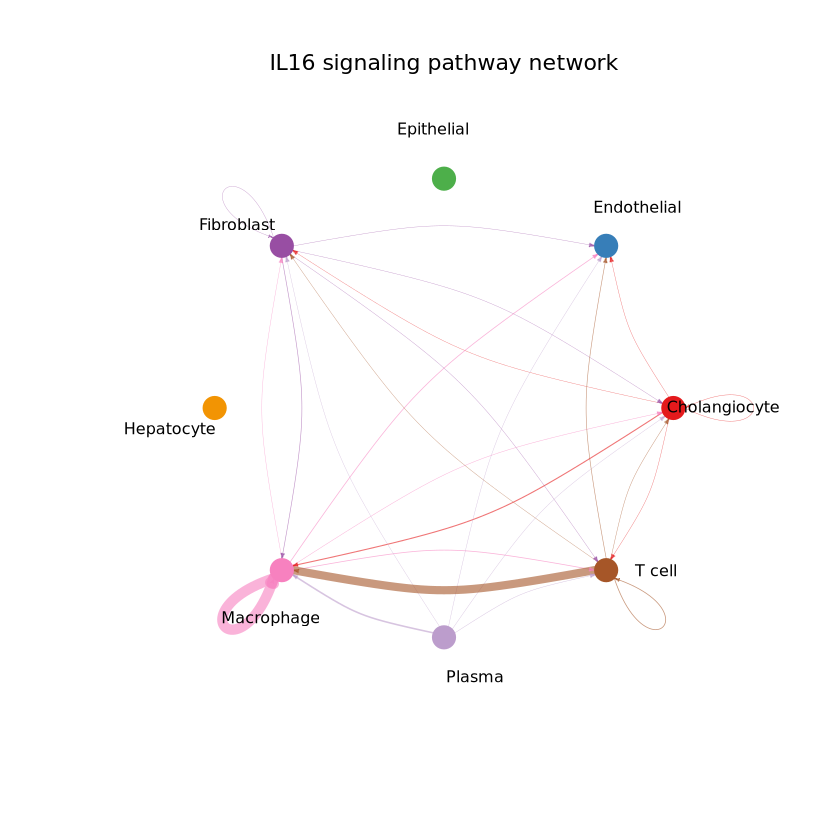

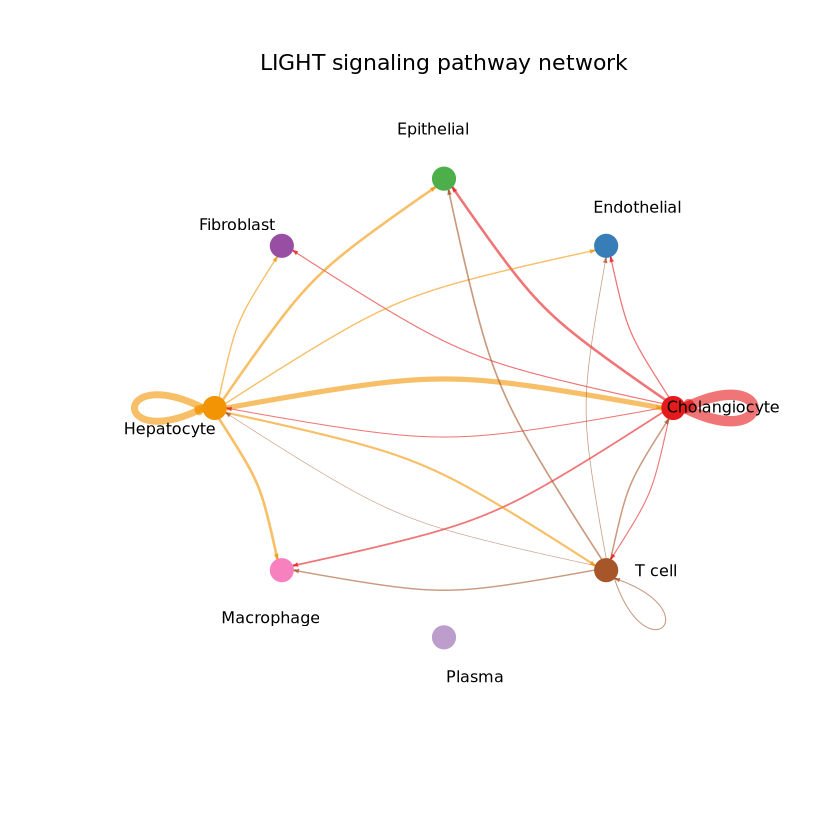

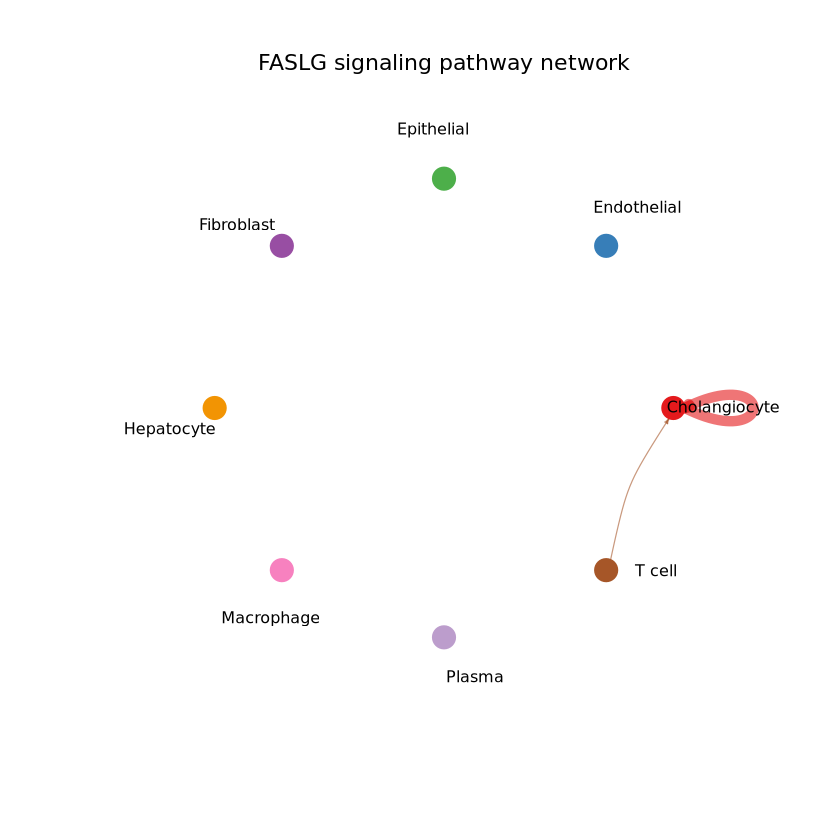

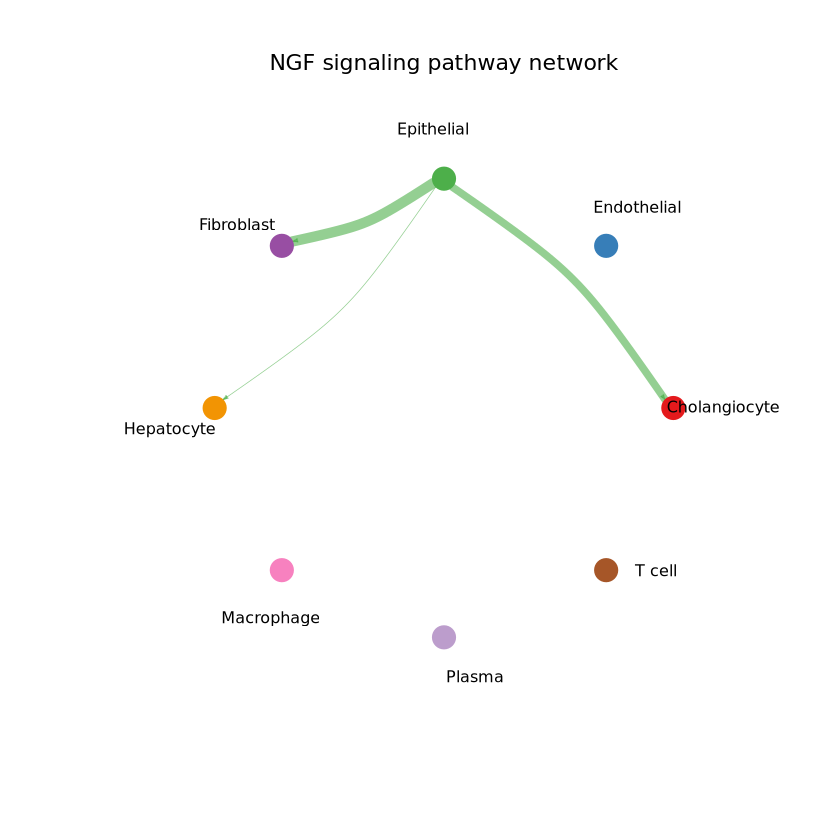

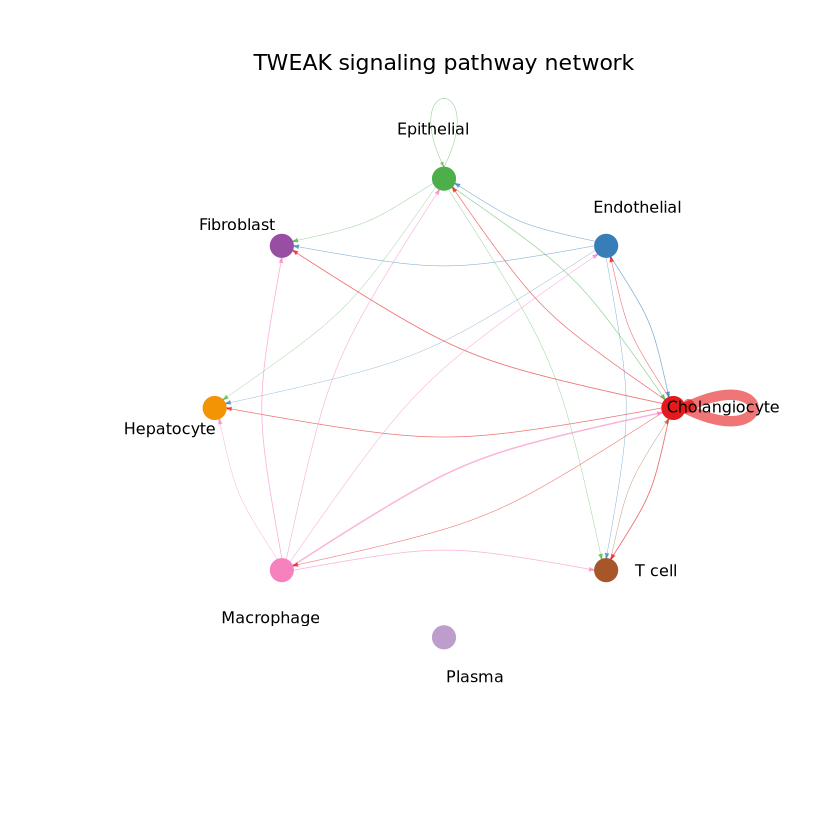

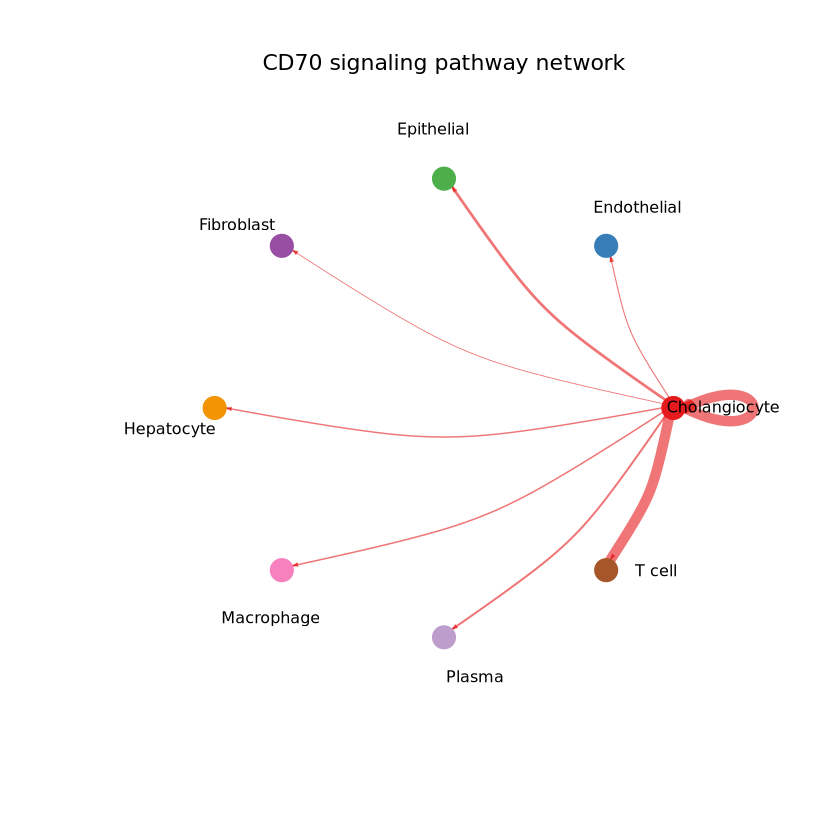

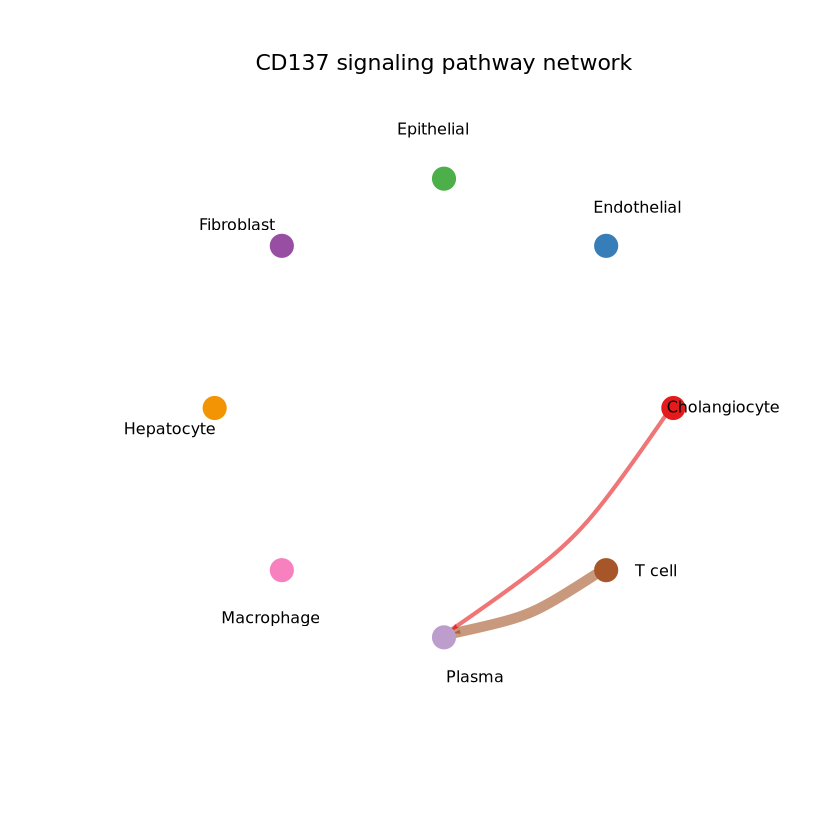

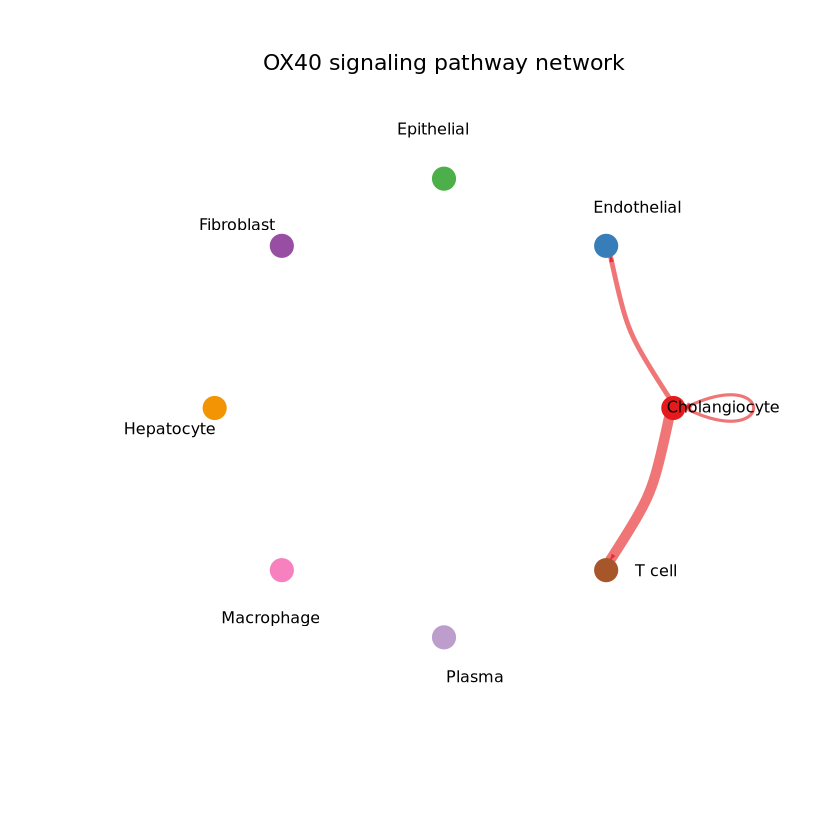

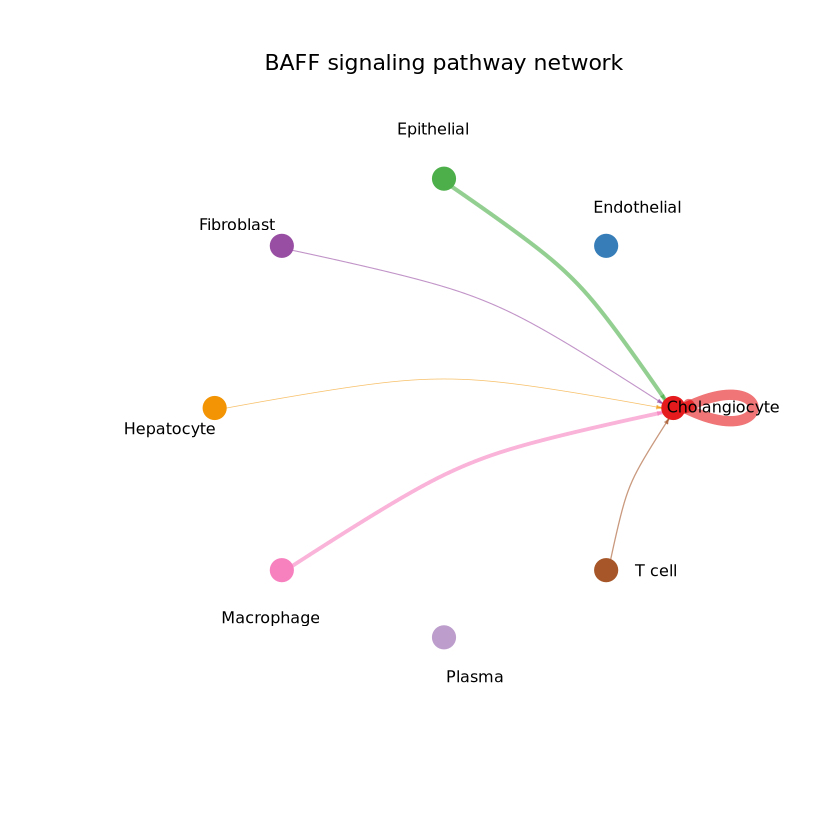

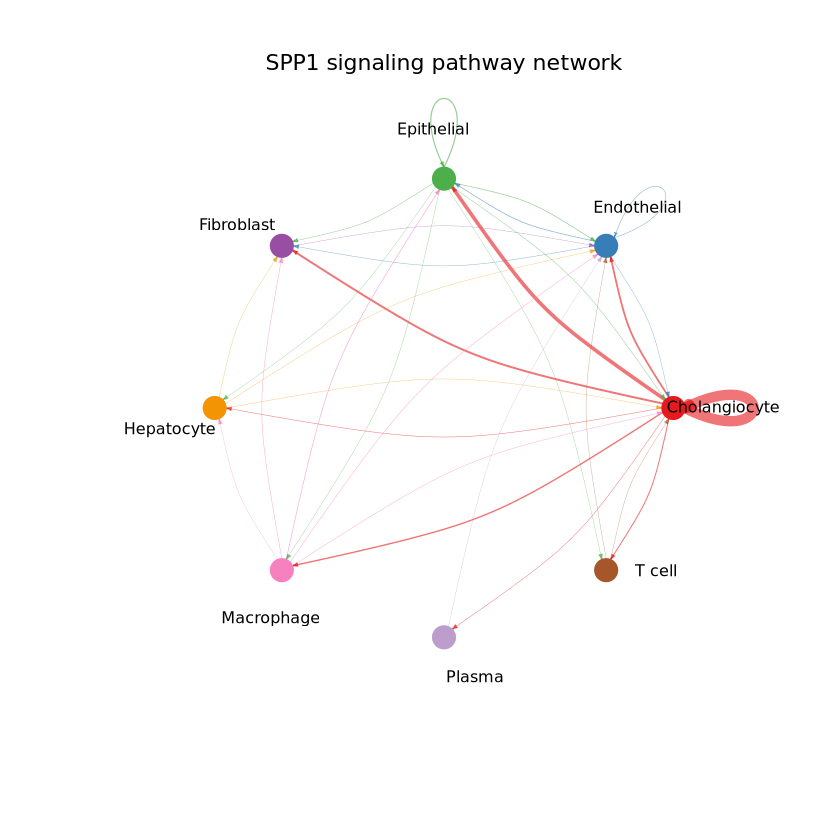

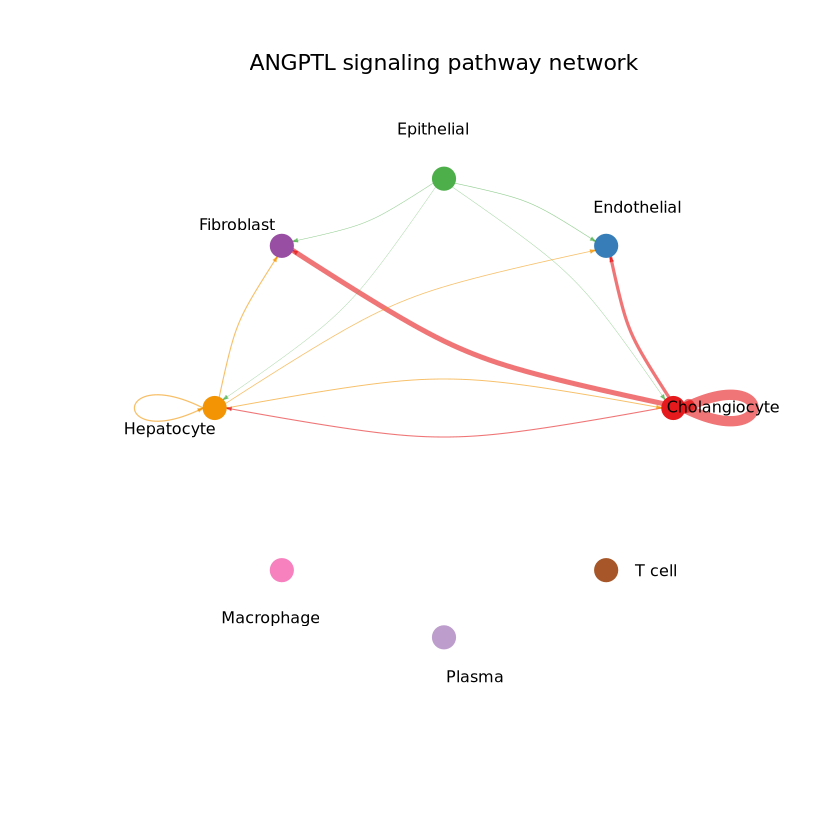

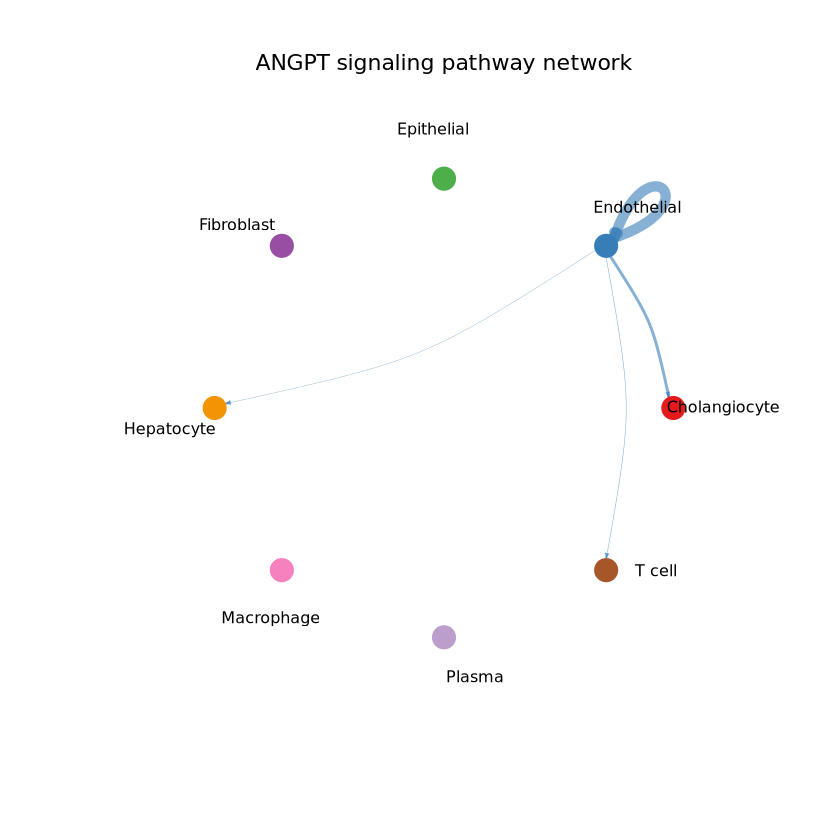

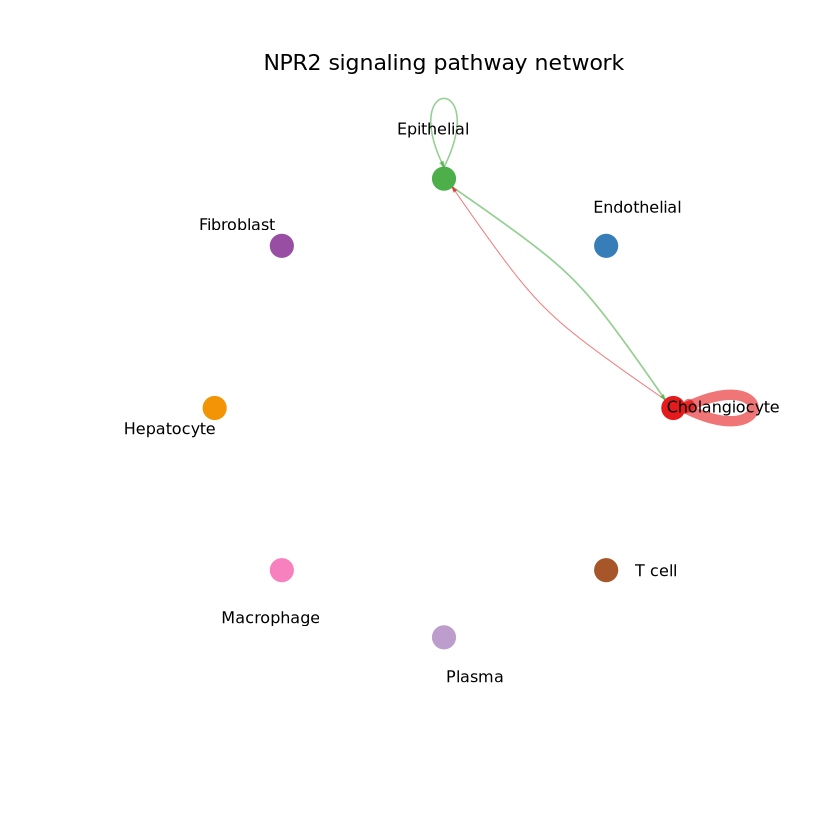

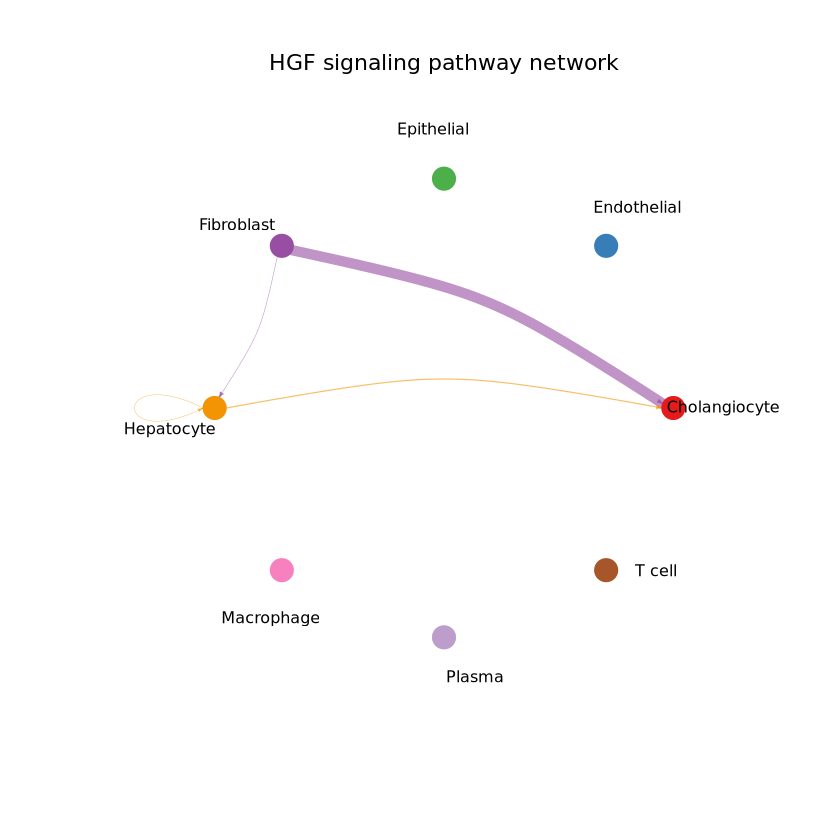

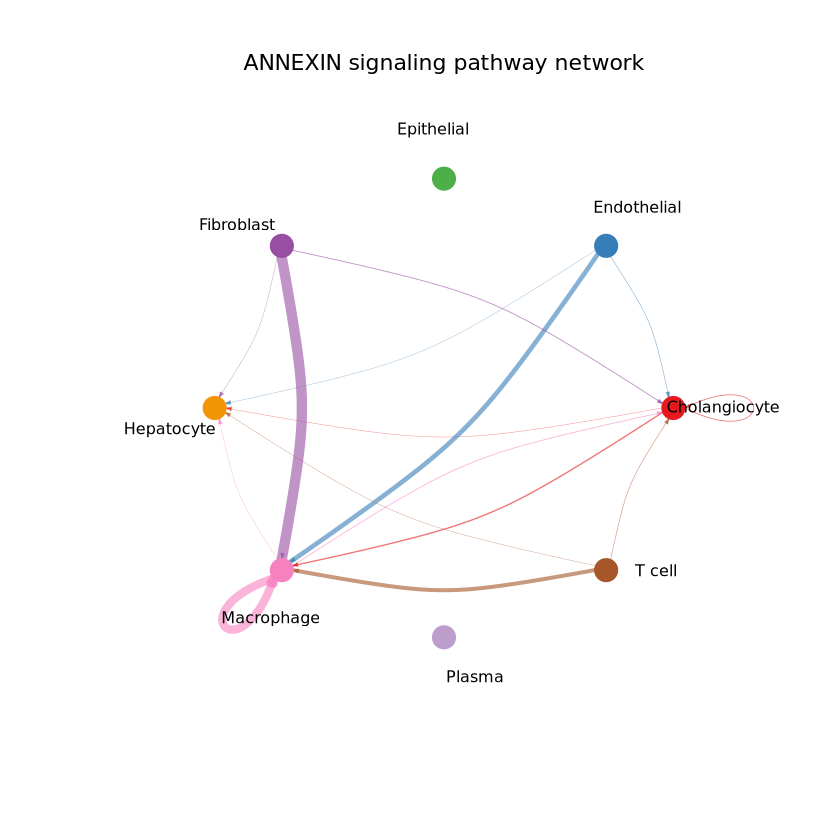

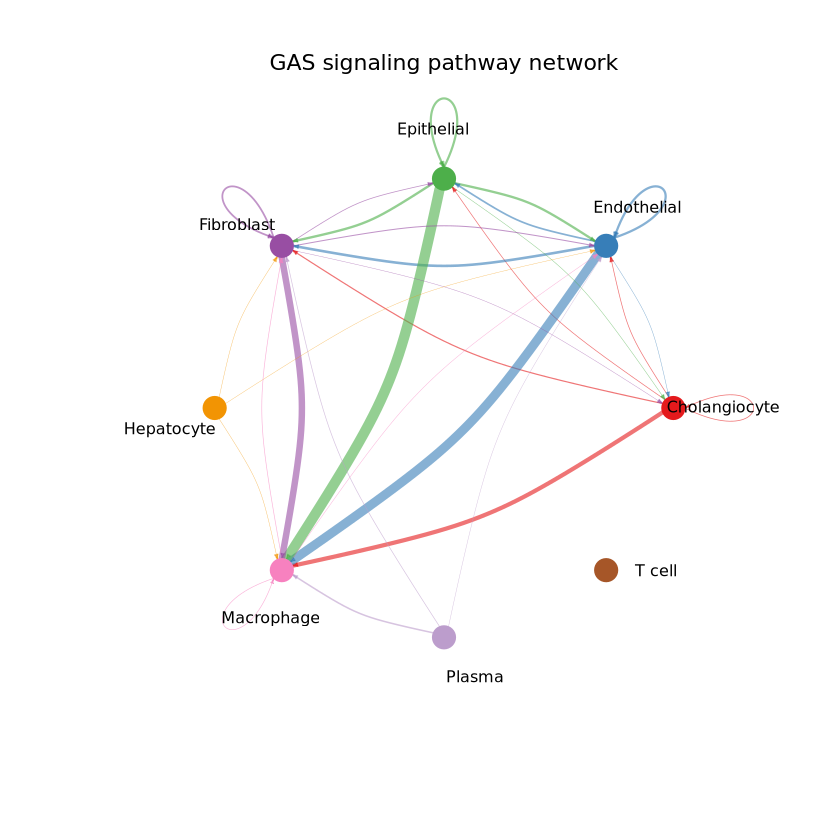

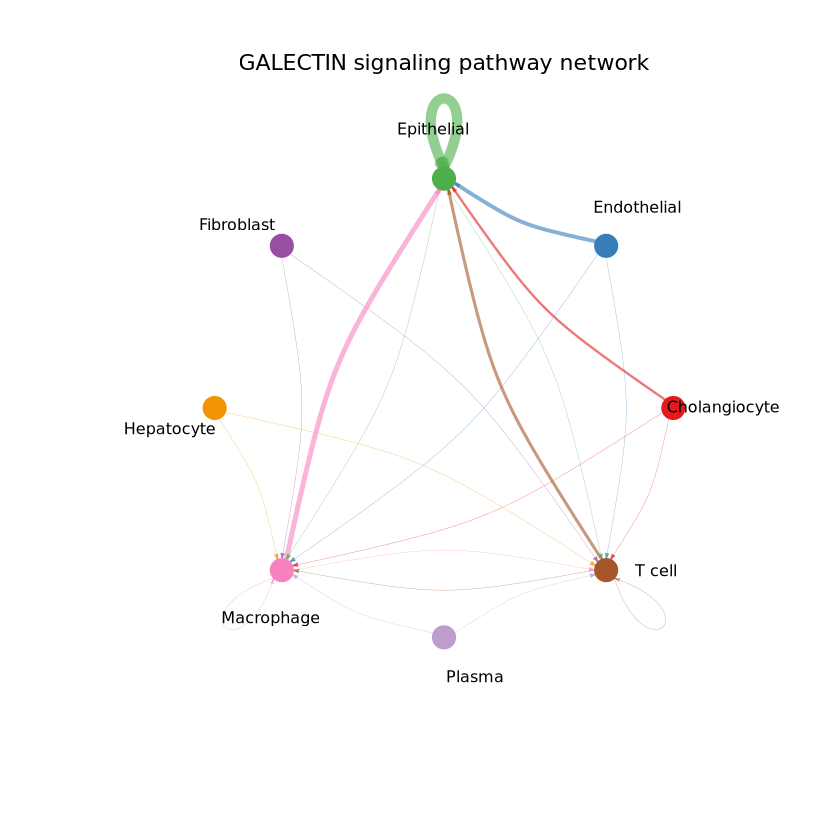

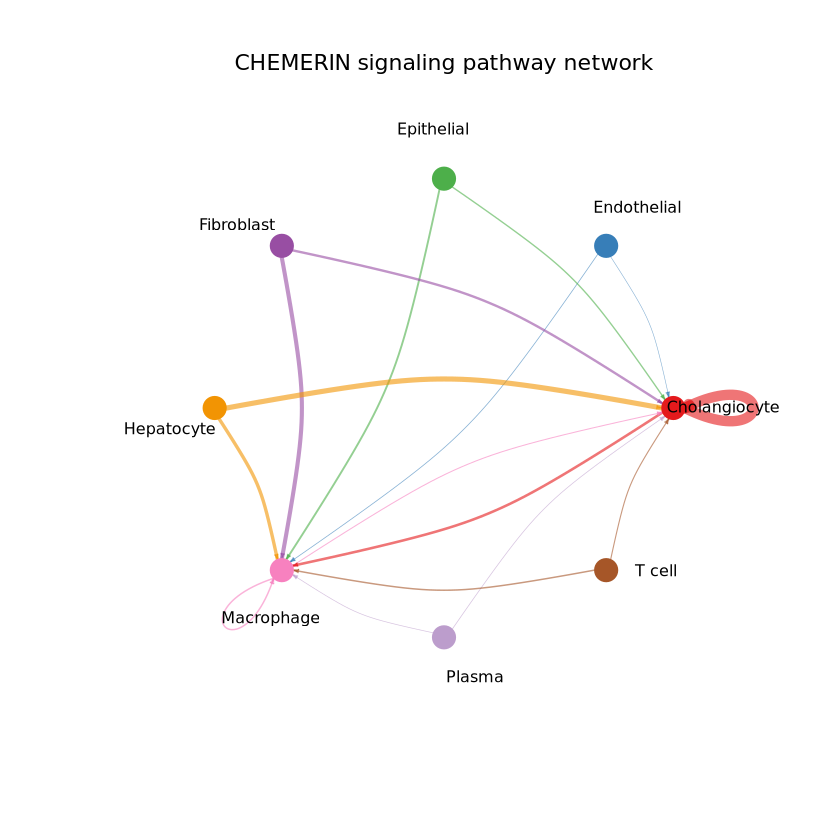

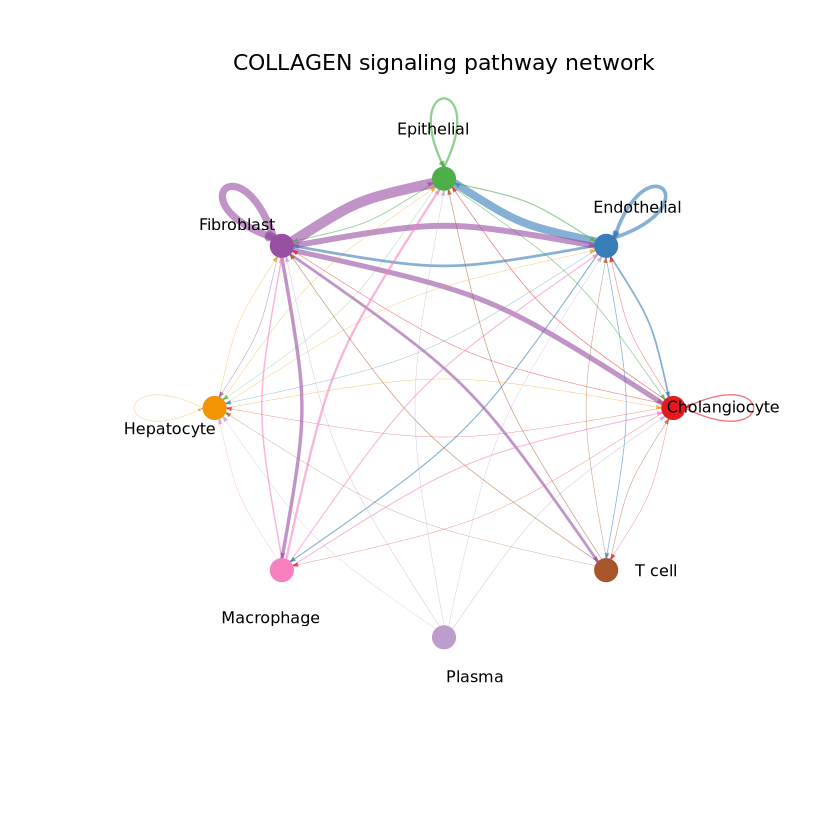

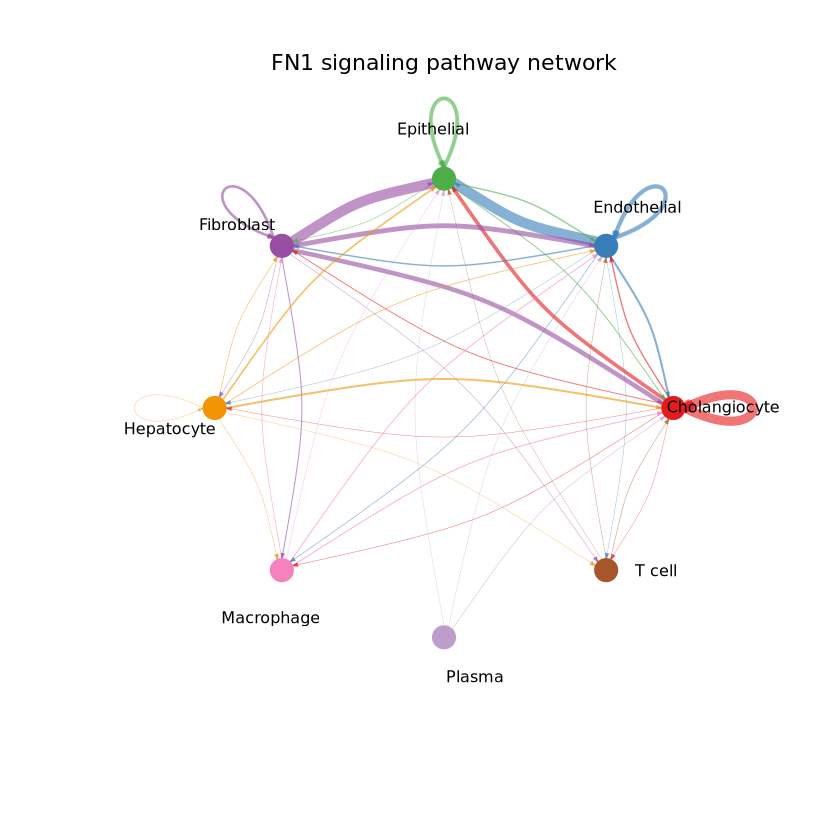

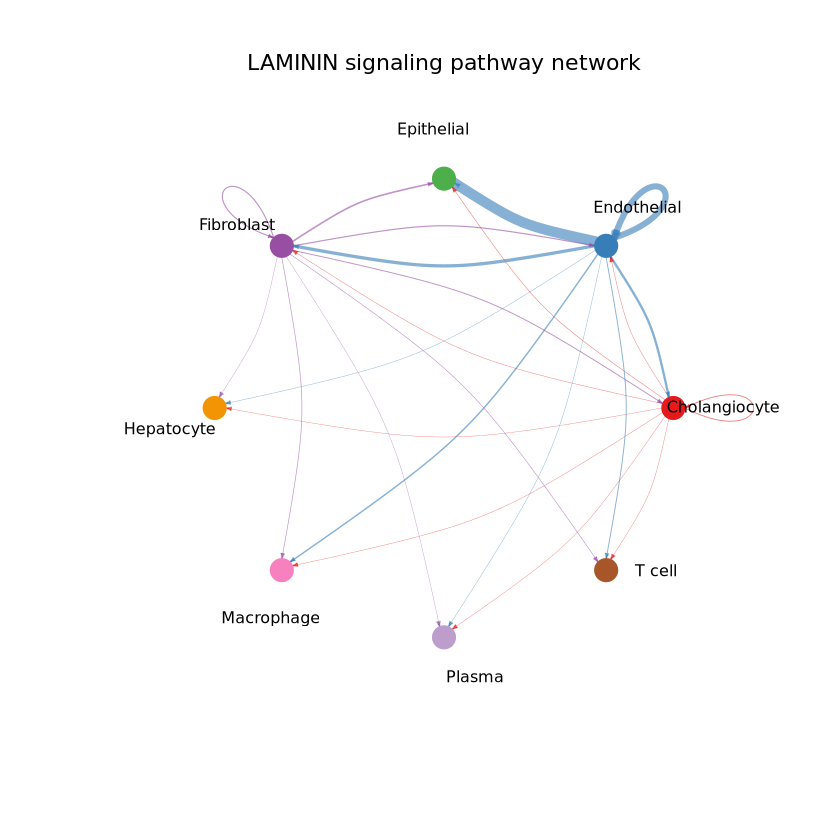

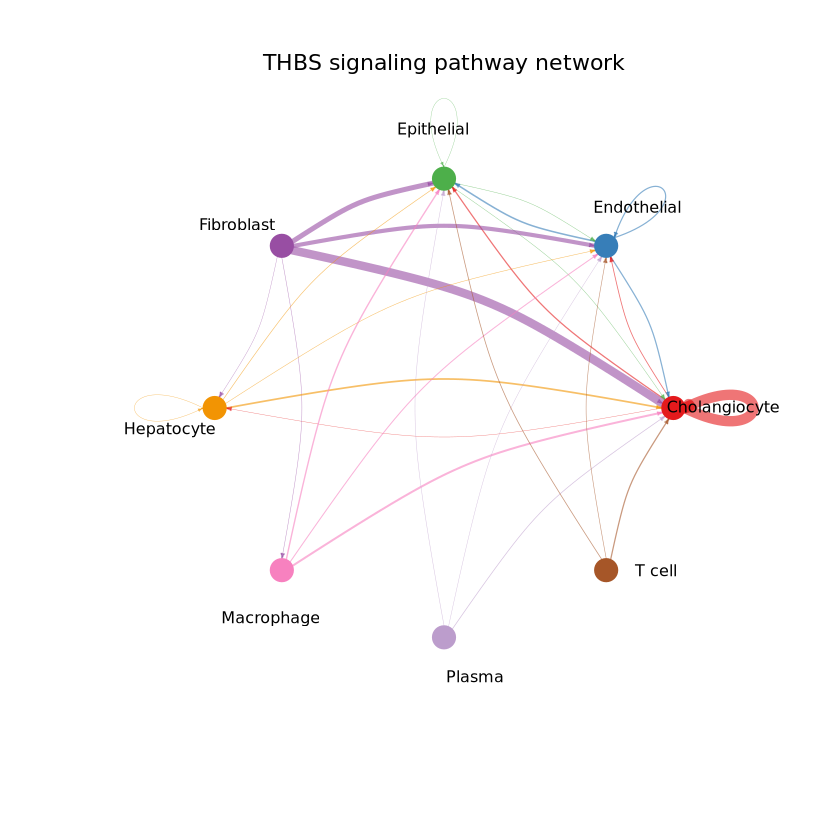

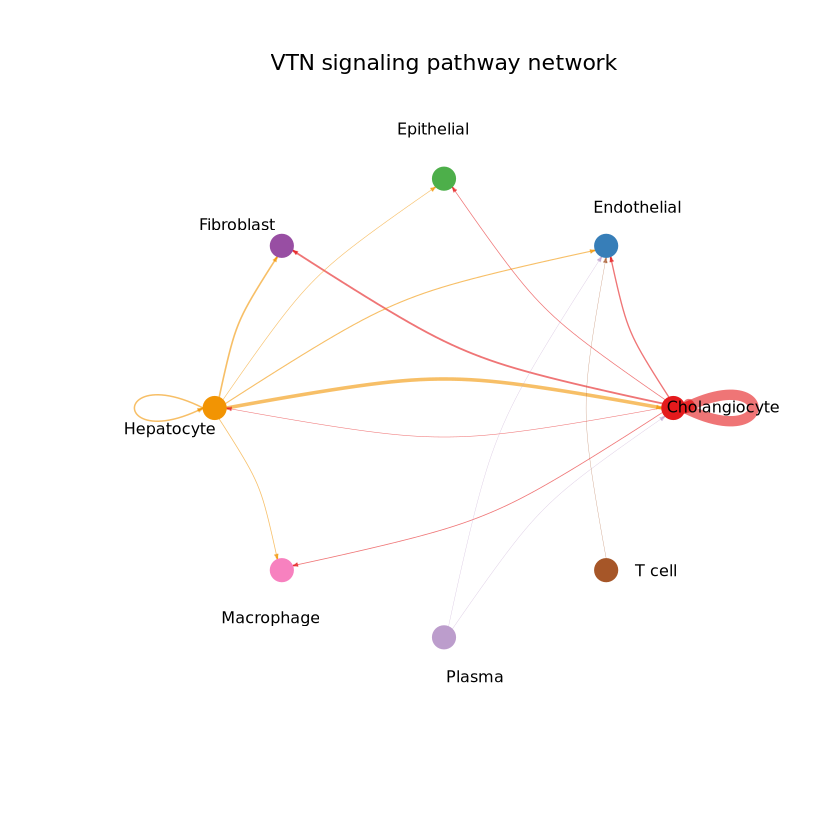

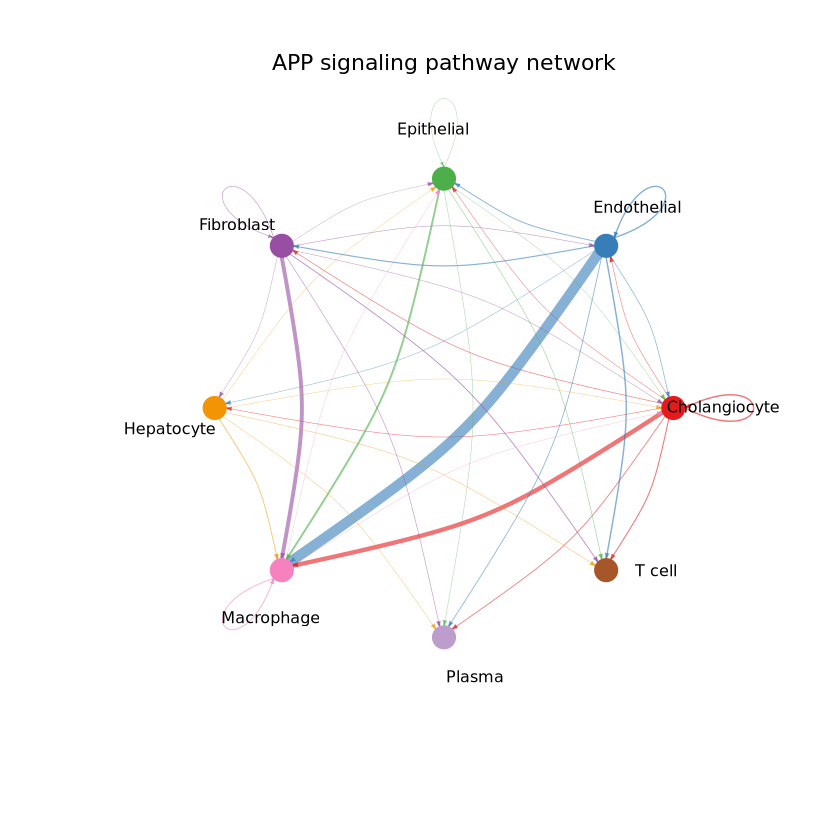

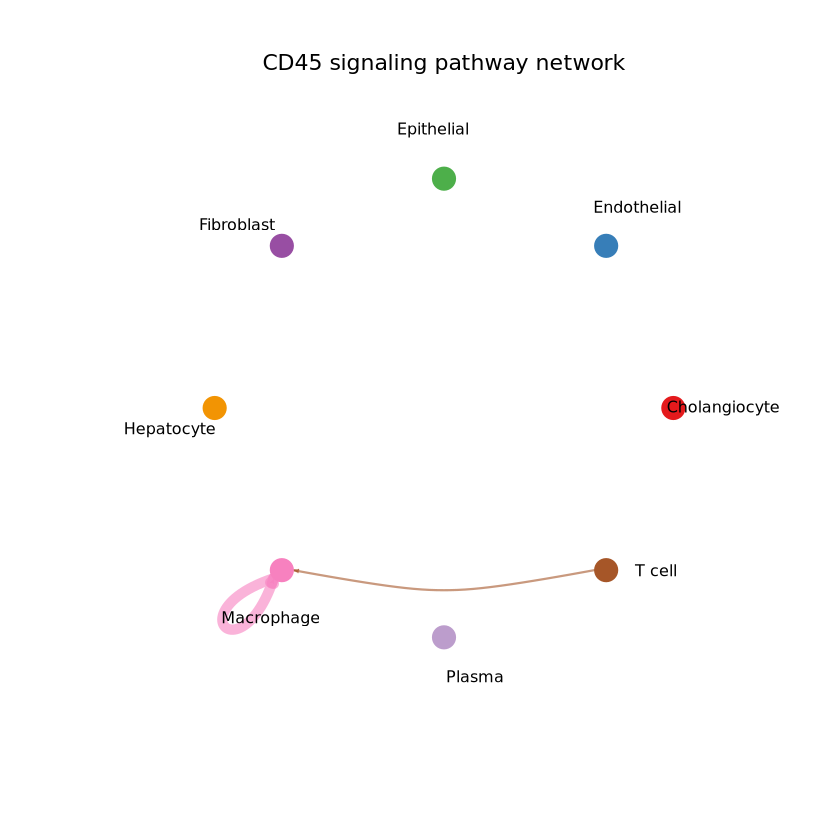

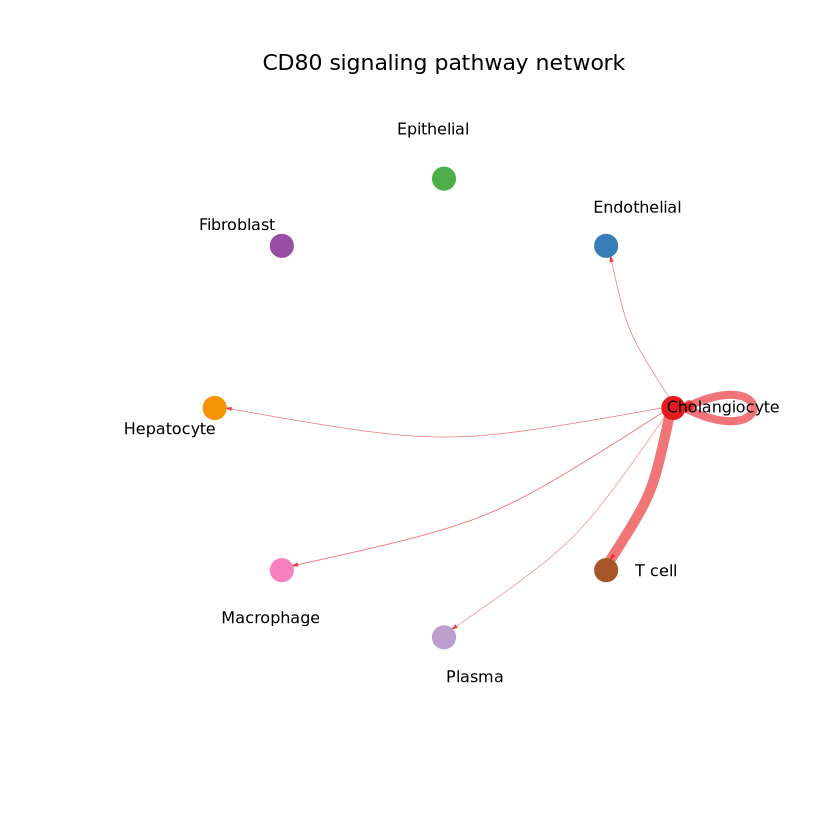

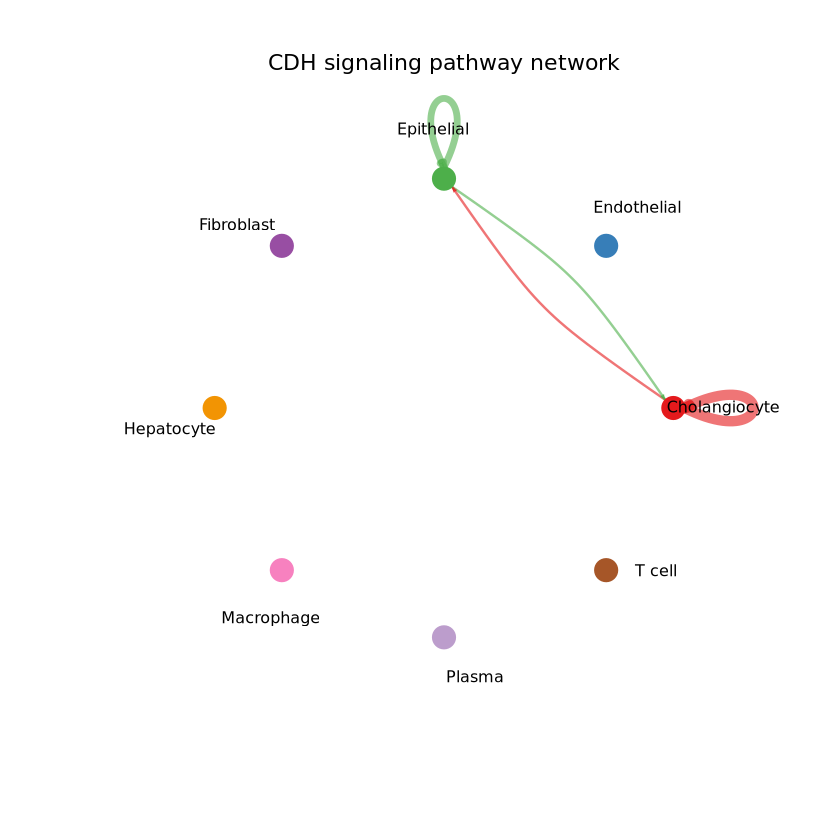

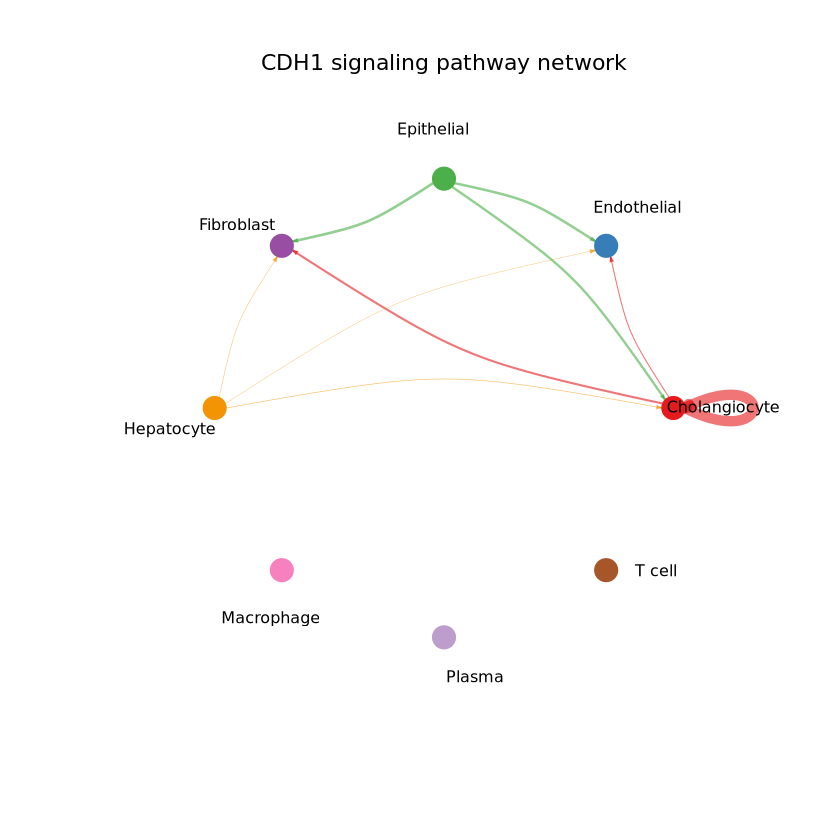

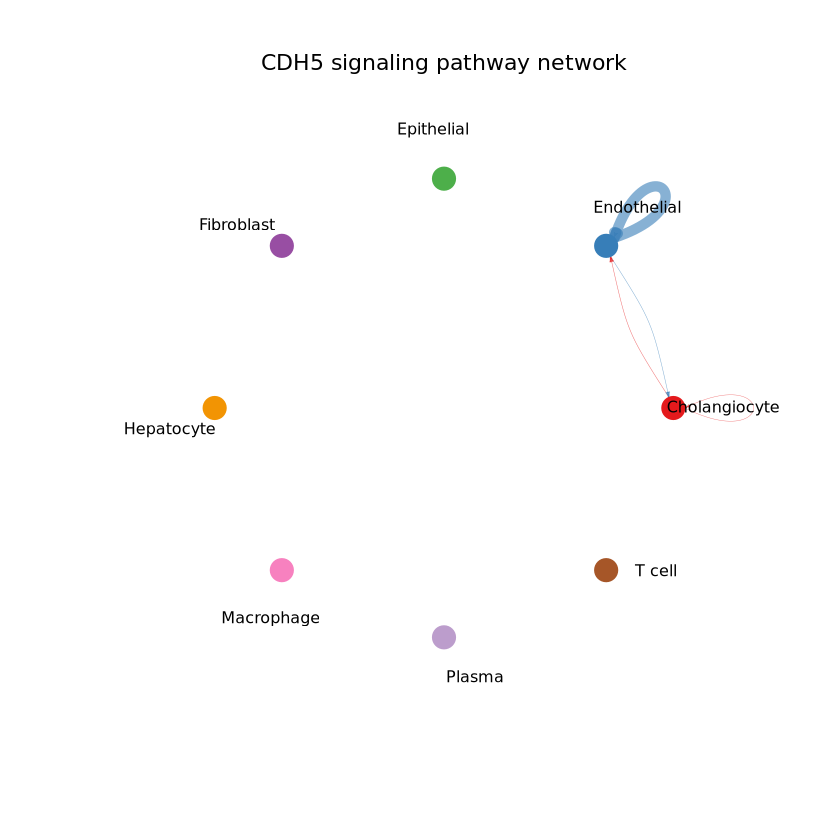

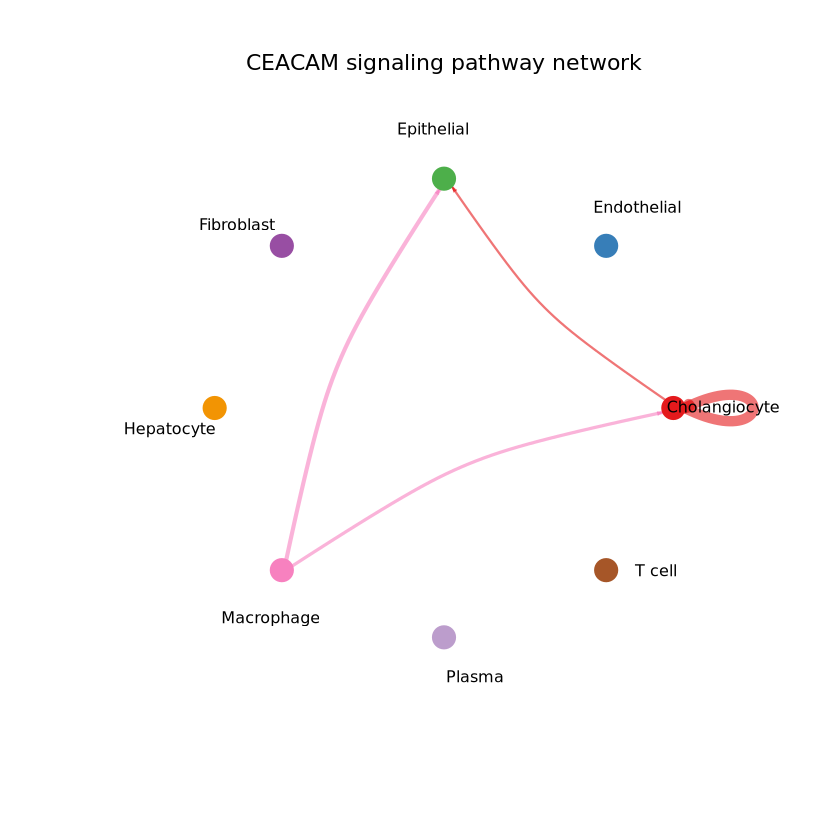

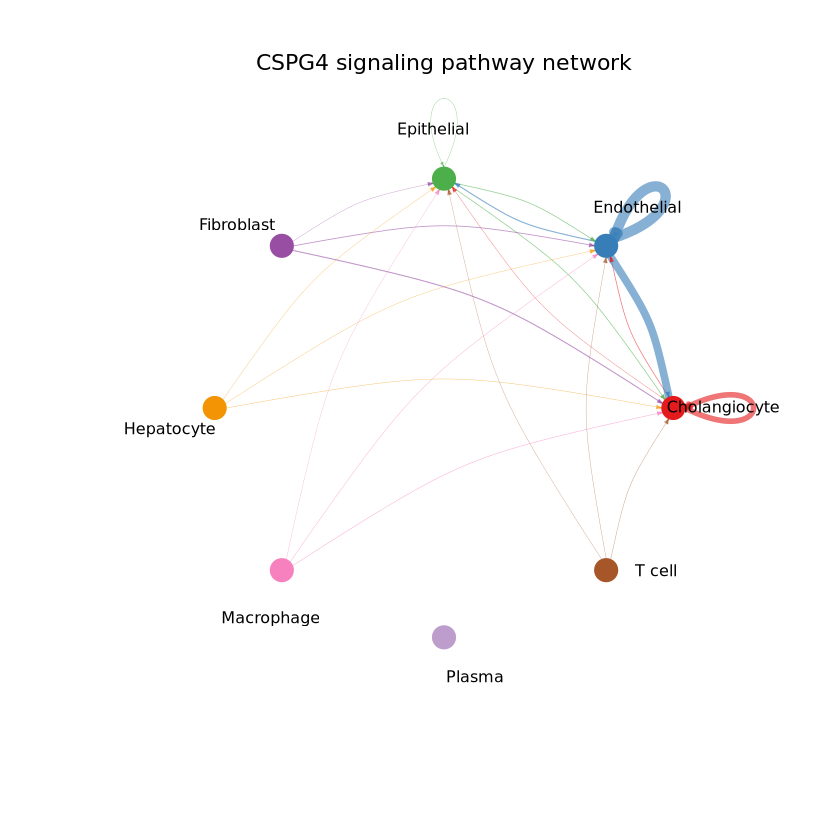

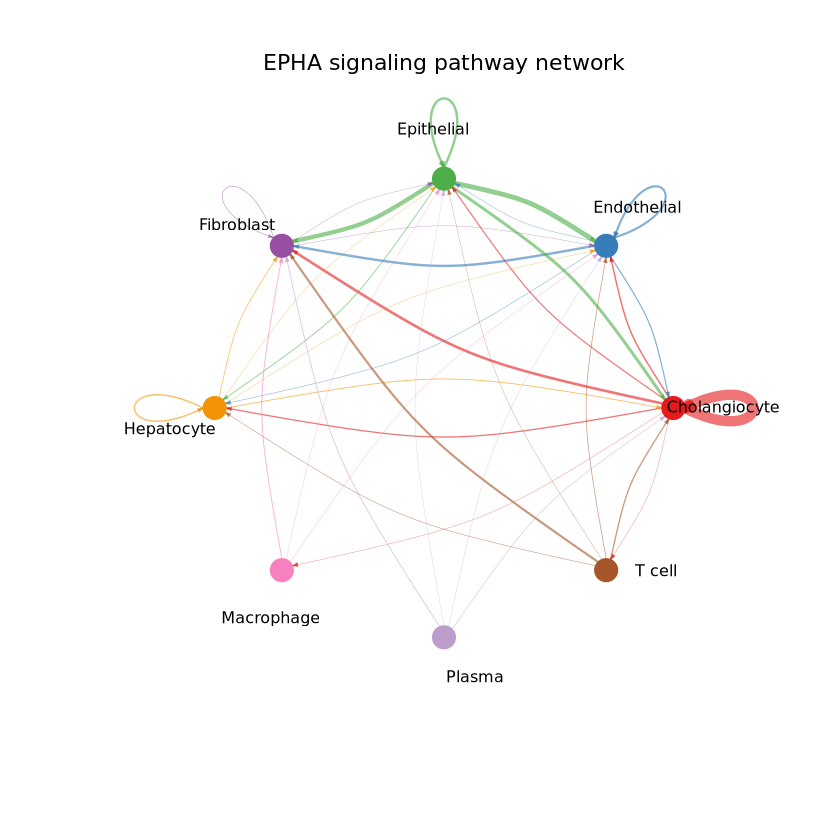

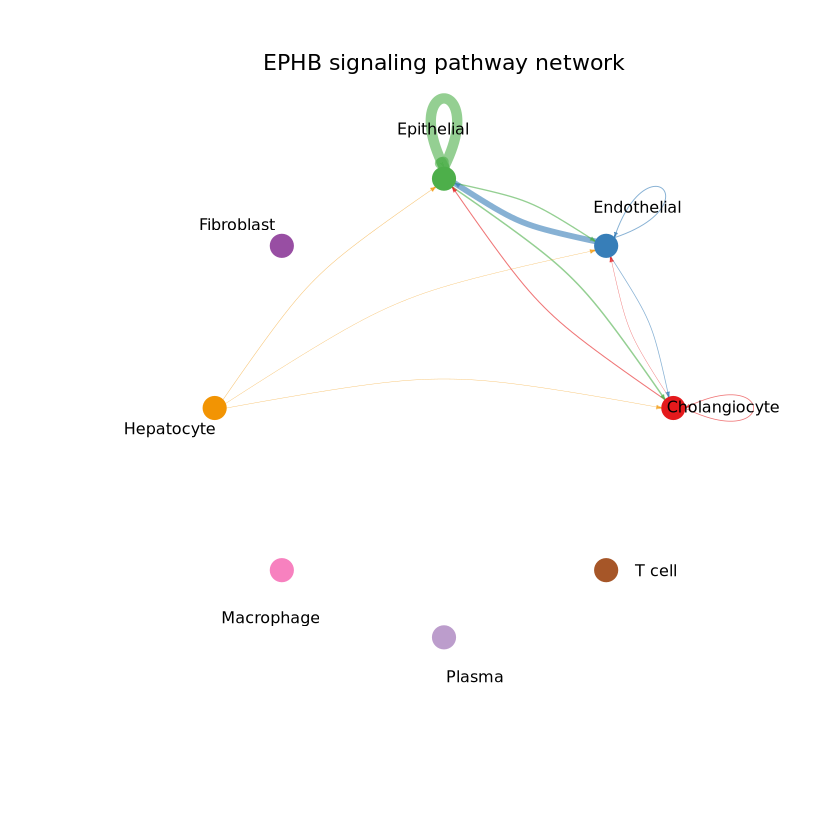

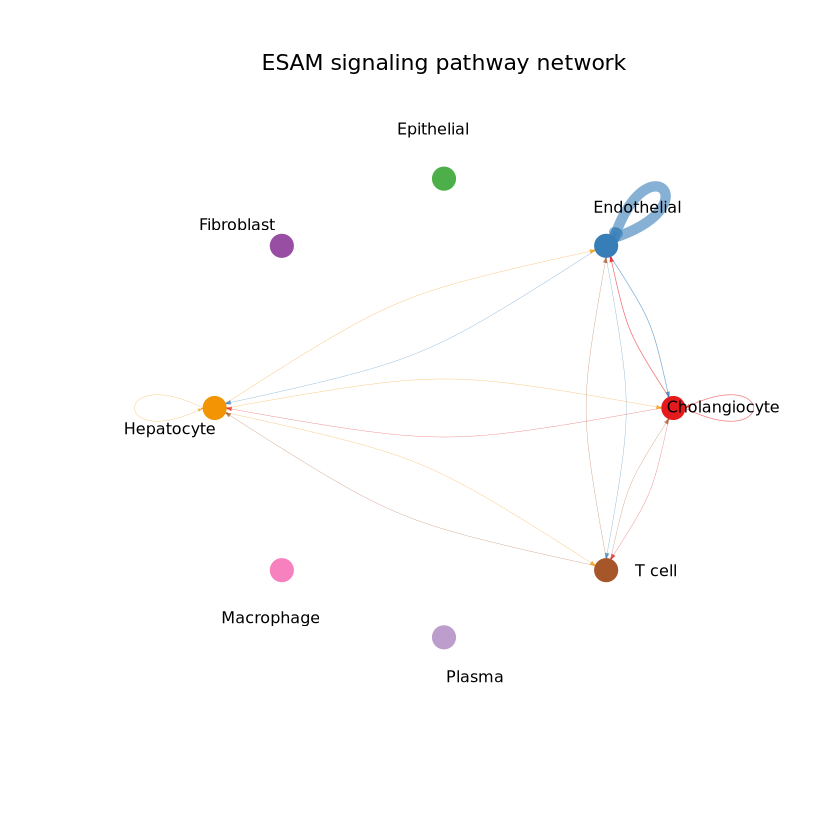

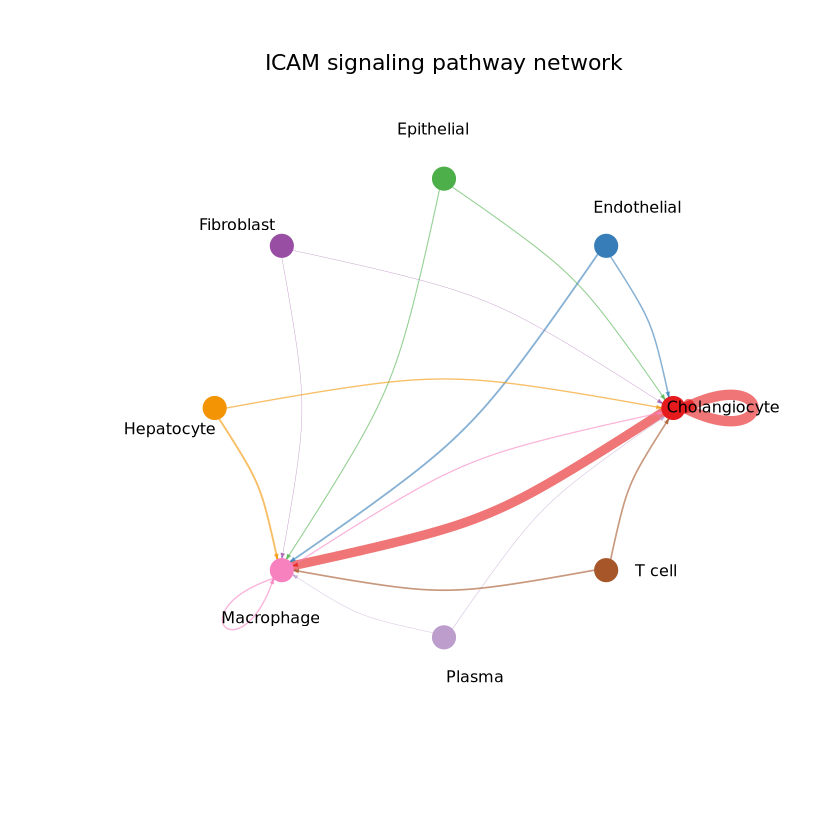

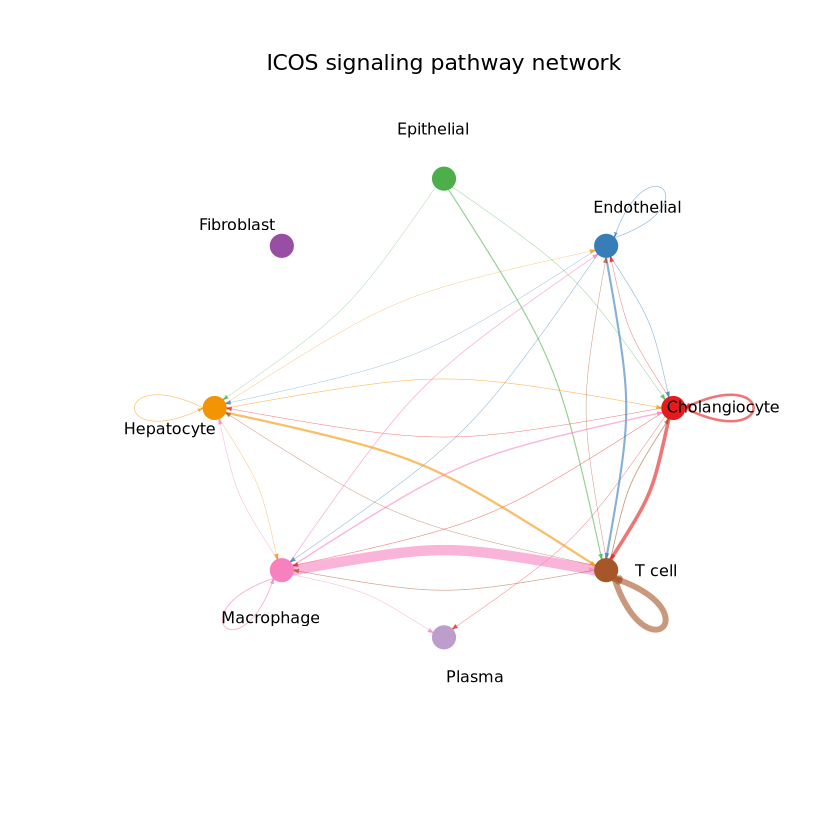

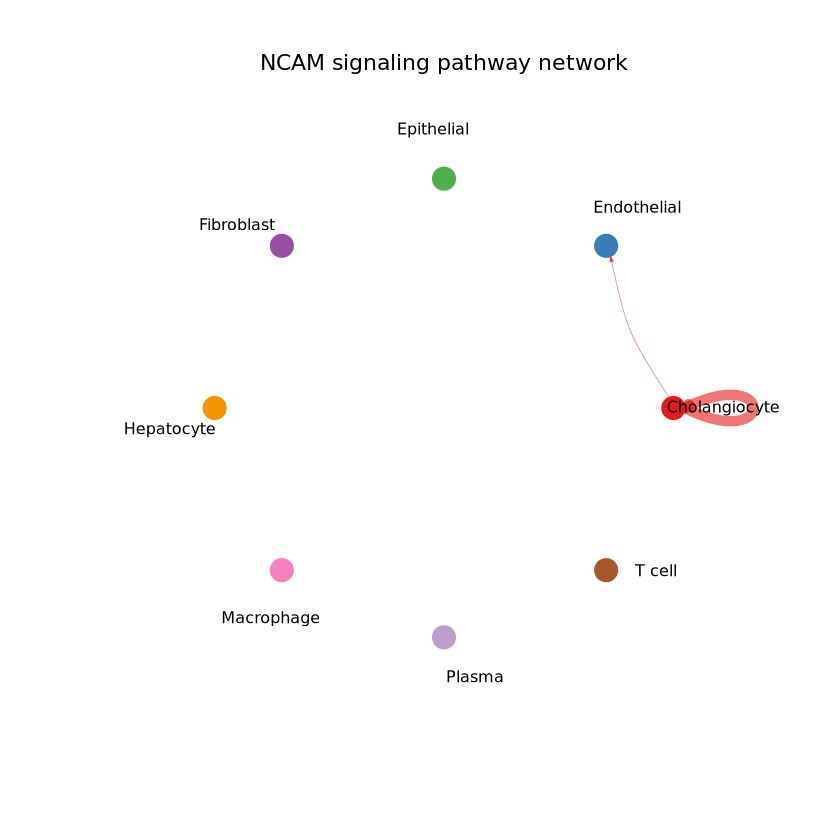

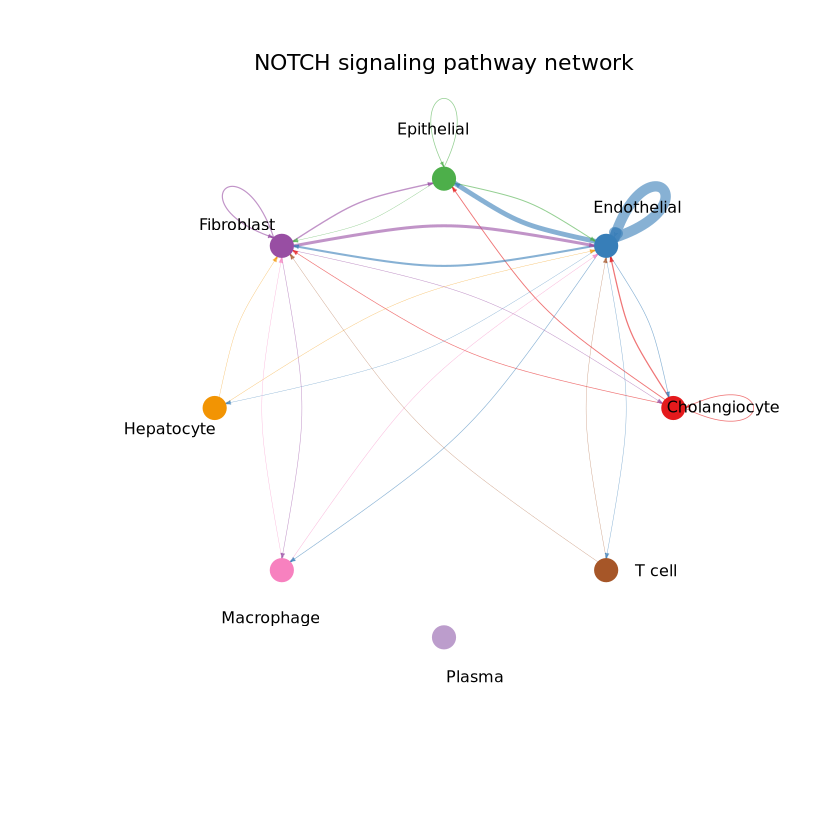

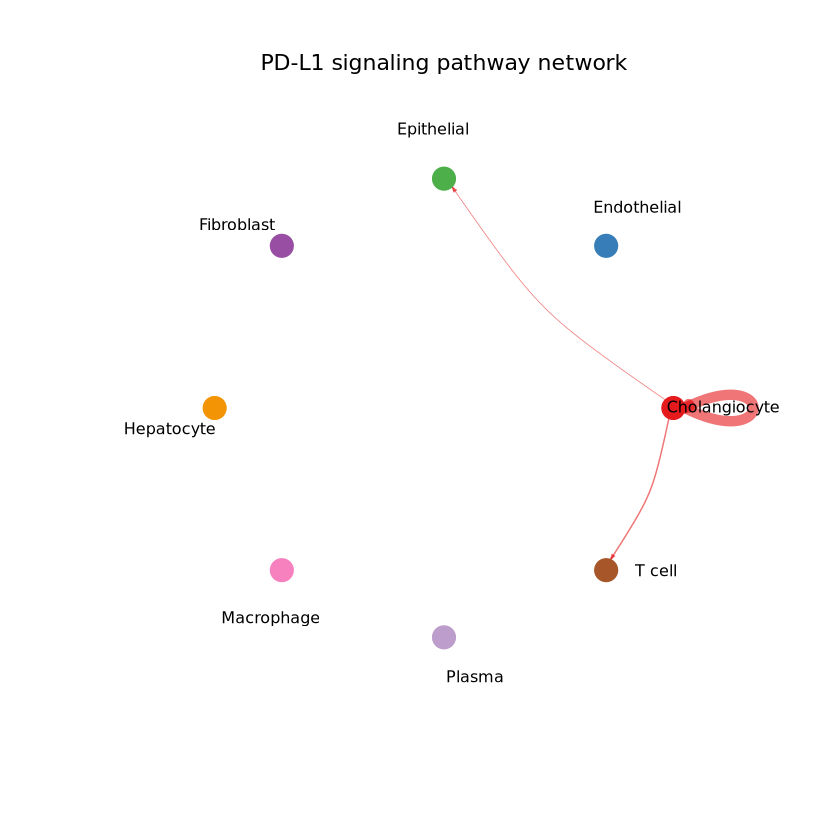

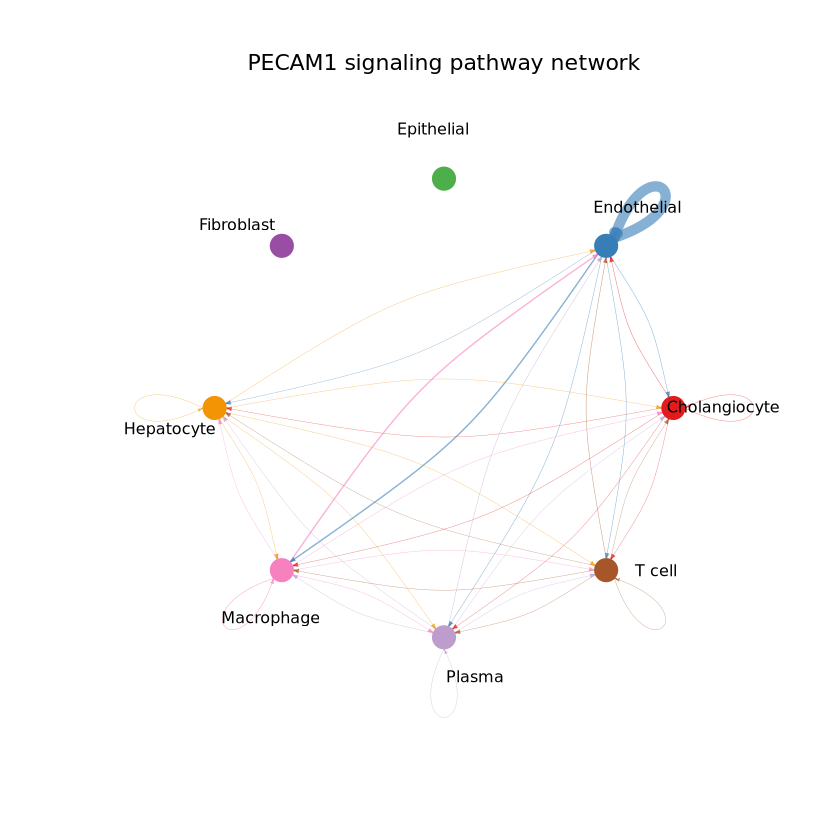

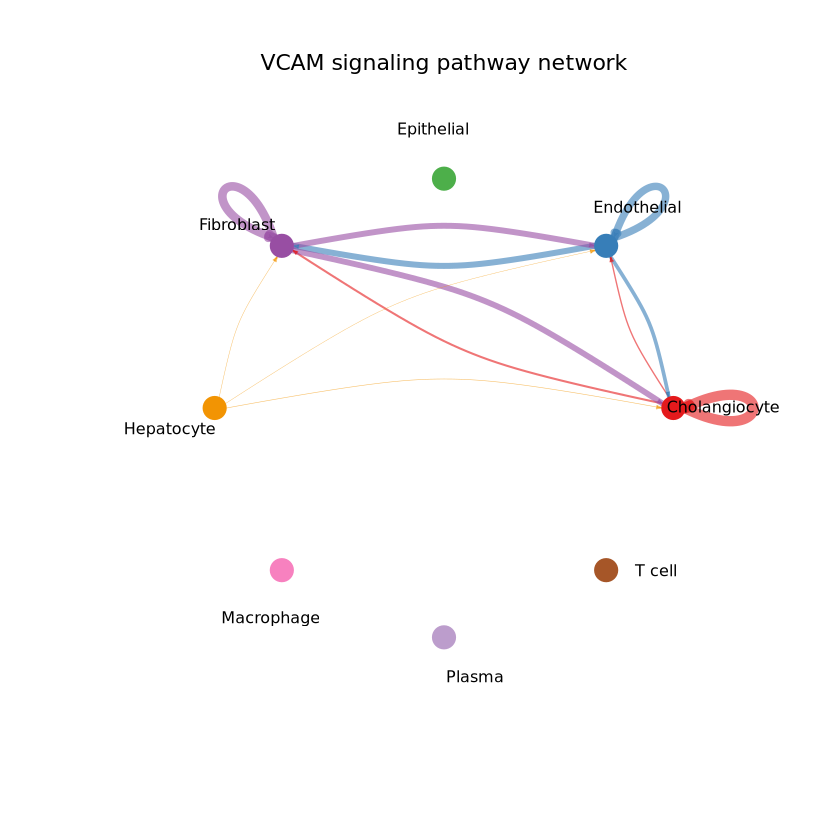

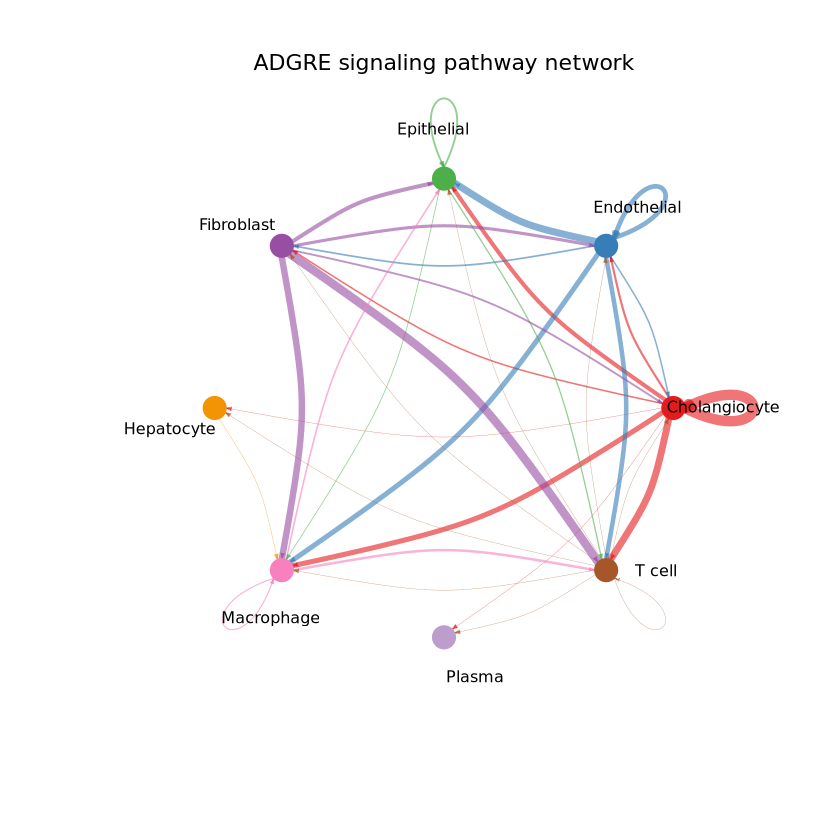

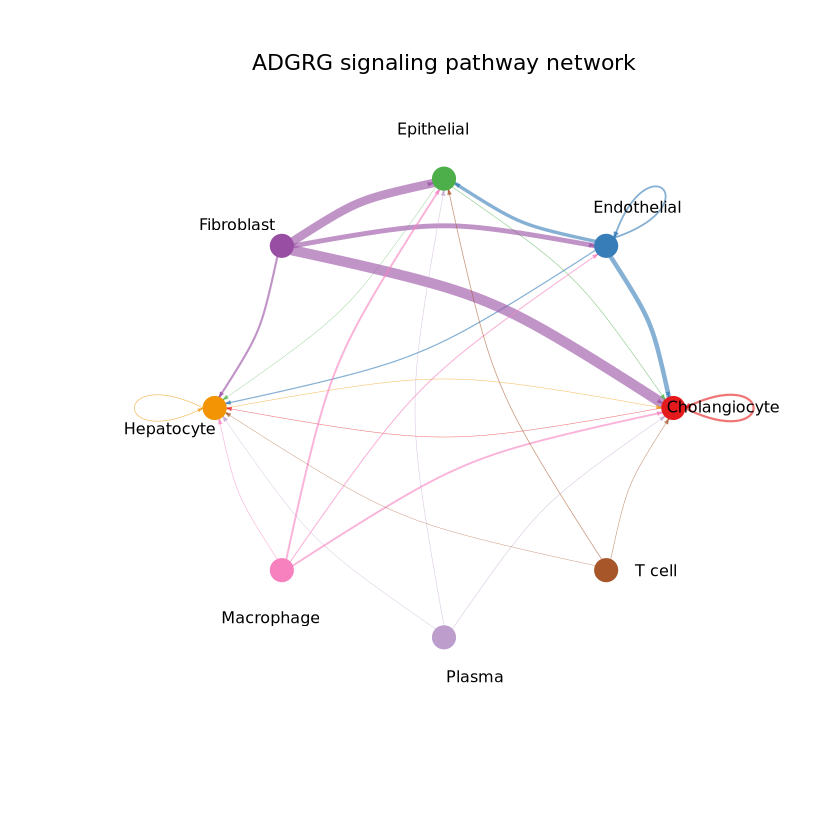

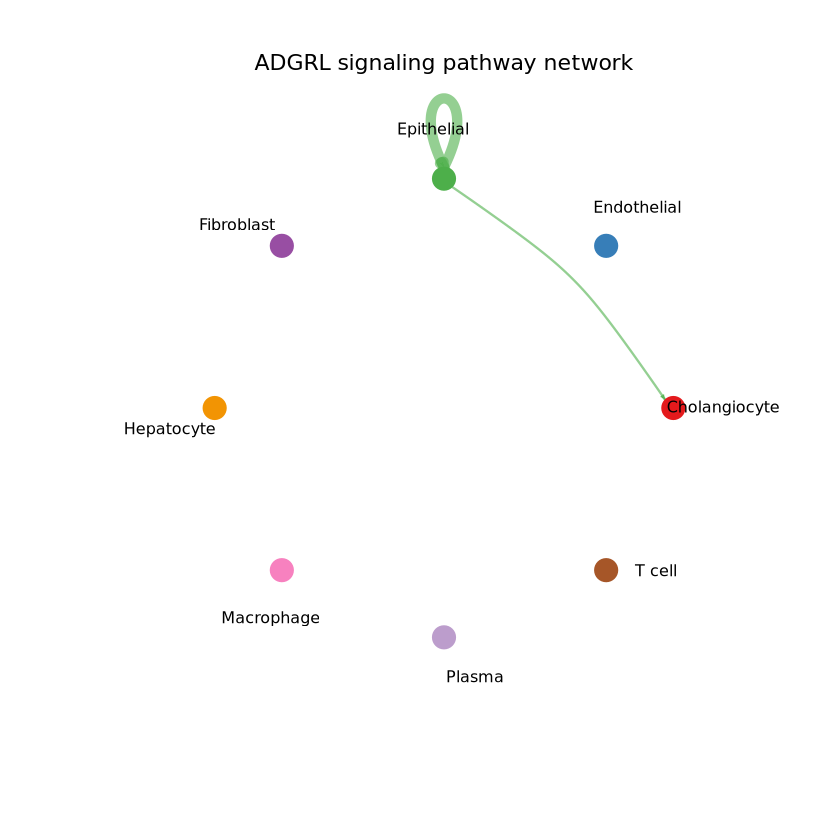

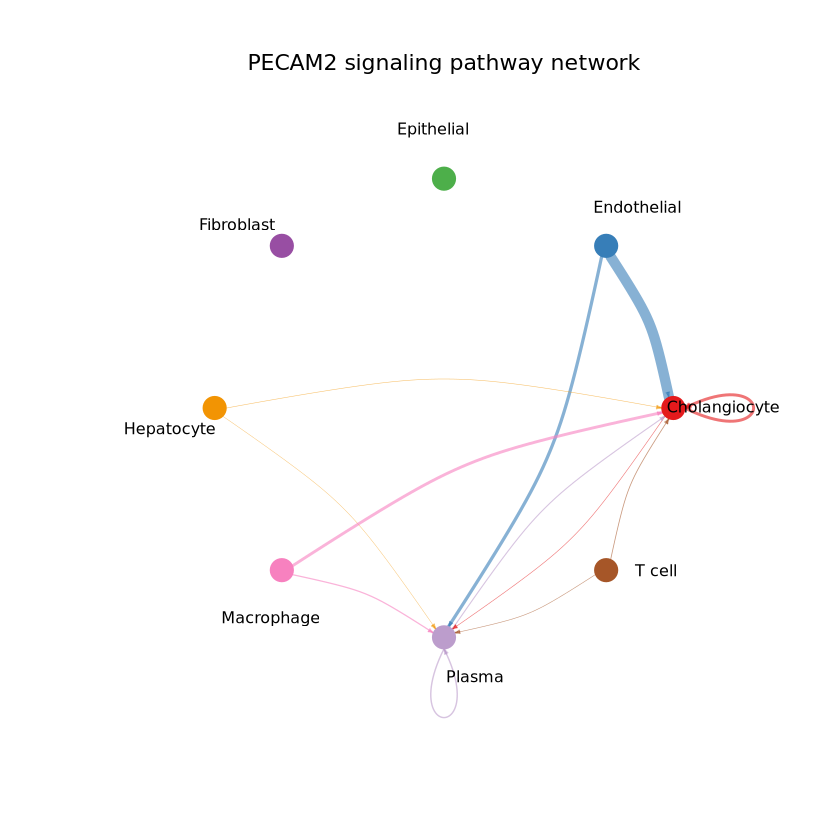

In [20]:
for (pathway in unique(df.net$pathway_name)) {
    par(mfrow=c(1,1), xpd = TRUE) # `xpd = TRUE` should be added to show the title
    netVisual_aggregate(cosmx, signaling = c(pathway), layout = "circle")
}


In [27]:
unique(cosmx@meta$samples)

[1] HT413C1-Th1k4A1-U7  HT413C1-Th1k4A1-U34
Levels: HT413C1-Th1k4A1-U34 HT413C1-Th1k4A1-U7

In [35]:
pdf(file = "/data/estorrs/sandbox/pdgf.pdf")
par(mfrow=c(1,1), xpd = TRUE) # `xpd = TRUE` should be added to show the title
p = netVisual_aggregate(cosmx, signaling = c("PDGF"), layout = "circle")
dev.off()

png 
  2

In [36]:
pdf(file = "/data/estorrs/sandbox/pdgf_heatmap.pdf")
netAnalysis_signalingRole_network(cosmx, signaling = c("PDGF"), width = 8, height = 2.5, font.size = 10)
dev.off()

png 
  2

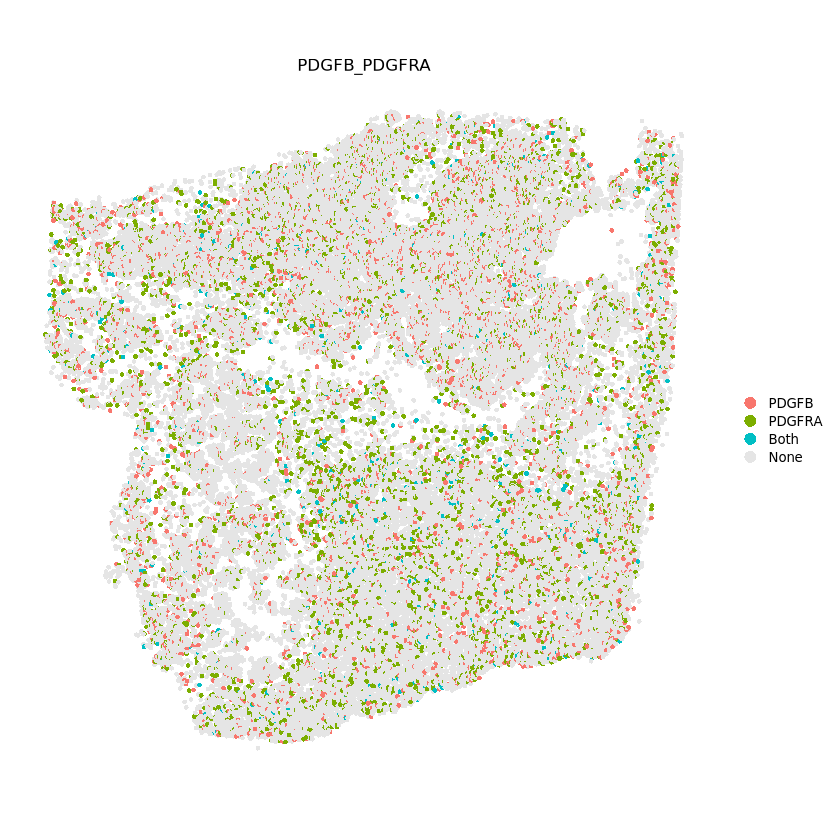

In [31]:
spatialFeaturePlot(cosmx, pairLR.use = "PDGFB_PDGFRA", point.size = 1, do.binary = TRUE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1, sample.use = "HT413C1-Th1k4A1-U7")


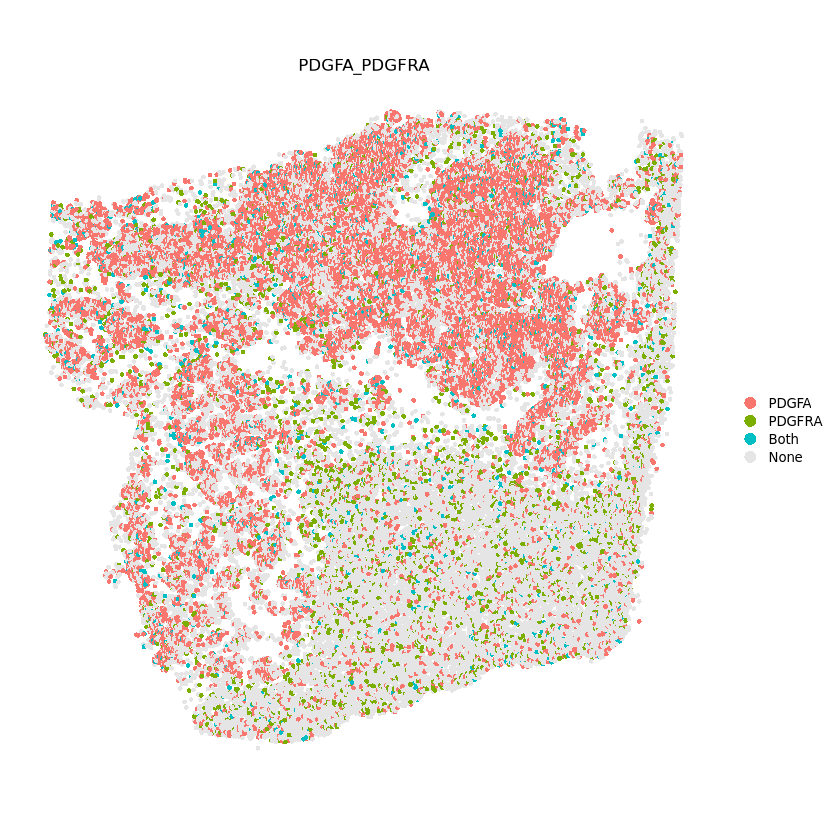

In [32]:
spatialFeaturePlot(cosmx, pairLR.use = "PDGFA_PDGFRA", point.size = 1, do.binary = TRUE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1, sample.use = "HT413C1-Th1k4A1-U7")


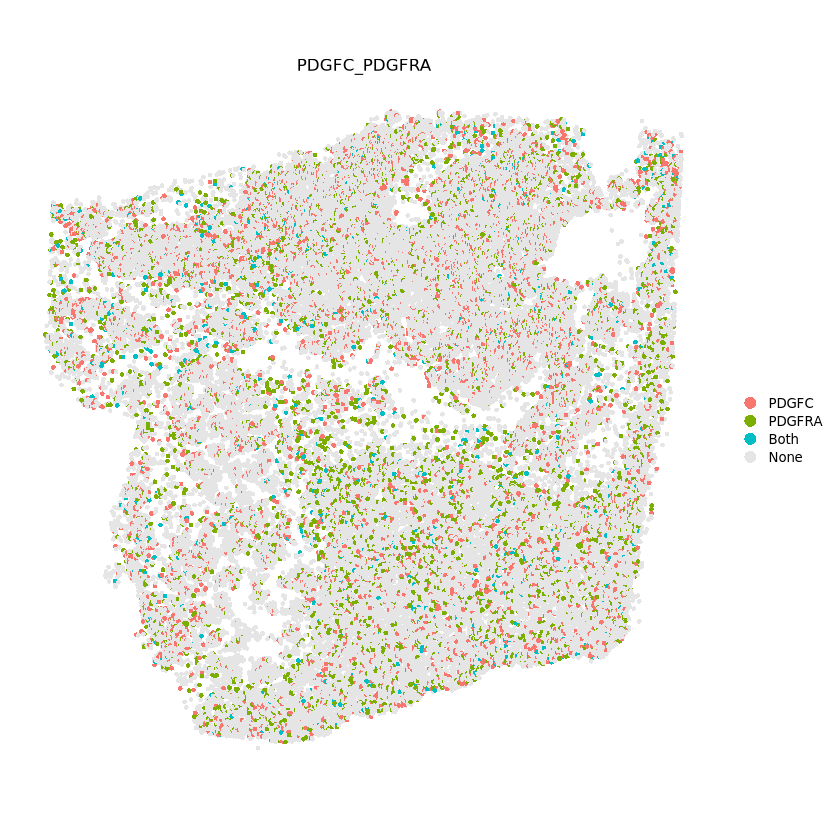

In [33]:
spatialFeaturePlot(cosmx, pairLR.use = "PDGFC_PDGFRA", point.size = 1, do.binary = TRUE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1, sample.use = "HT413C1-Th1k4A1-U7")


In [22]:
cosmx

An object of class CellChat created from a single dataset 
 1000 genes.
 111069 cells. 
CellChat analysis of spatial data! The input spatial locations are 
                            x_cent y_cent
HT413C1-Th1k4A1-U7_c_1_44_2   2618   1394
HT413C1-Th1k4A1-U7_c_1_44_3   2597   1399
HT413C1-Th1k4A1-U7_c_1_44_4   2608   1401
HT413C1-Th1k4A1-U7_c_1_44_5   2626   1400
HT413C1-Th1k4A1-U7_c_1_44_6   2350   1426
HT413C1-Th1k4A1-U7_c_1_44_7   2291   1432

In [5]:
head(cosmx@meta)

labels        samples           
HT413C1-Th1k4A1-U7_c_1_44_2 Epithelial    HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_3 Epithelial    HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_4 Epithelial    HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_5 Epithelial    HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_6 Cholangiocyte HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_7 Epithelial    HT413C1-Th1k4A1-U7

In [7]:
unique(cosmx@meta$labels)

[1] "Epithelial"    "Cholangiocyte" "Macrophage"    "Fibroblast"   
[5] "T cell"        "Endothelial"   "Plasma"        "Hepatocyte"

In [9]:
?netVisual_aggregate

netVisual_aggregate          package:CellChat          R Documentation

_V_i_s_u_a_l_i_z_e _t_h_e _i_n_f_e_r_r_e_d _s_i_g_n_a_l_i_n_g _n_e_t_w_o_r_k _o_f _s_i_g_n_a_l_i_n_g _p_a_t_h_w_a_y_s _b_y
_a_g_g_r_e_g_a_t_i_n_g _a_l_l _L-_R _p_a_i_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     Visualize the inferred signaling network of signaling pathways by
     aggregating all L-R pairs

_U_s_a_g_e:

     netVisual_aggregate(
       object,
       signaling,
       signaling.name = NULL,
       color.use = NULL,
       thresh = 0.05,
       vertex.receiver = NULL,
       sources.use = NULL,
       targets.use = NULL,
       idents.use = NULL,
       top = 1,
       remove.isolate = FALSE,
       vertex.weight = 1,
       vertex.weight.max = NULL,
       vertex.size.max = NULL,
       weight.scale = TRUE,
       edge.weight.max = NULL,
       edge.width.max = 8,
       layout = c("circle", "hierarchy", "chord", "spatial"),
       pt.title = 12,
       title.space = 6,
       vertex.label.cex = 0.8,
       sample.use = NULL,
       alpha.image = 0.15,
       point.size = 1.5,
       group = NULL,
       cell.order = NULL,
       small.gap = 1,
       big.gap = 10,
       scale = FALSE,
       reduce = -1,
       show.legend = FALSE,
       legend.pos.x = 20,
       legend.pos.y = 20,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

  object: CellChat object

signaling: a signaling pathway name

signaling.name: alternative signaling pathway name to show on the plot

color.use: the character vector defining the color of each cell group

  thresh: threshold of the p-value for determining significant
          interaction

vertex.receiver: a numeric vector giving the index of the cell groups
          as targets in the first hierarchy plot

sources.use: a vector giving the index or the name of source cell
          groups

targets.use: a vector giving the index or the name of target cell
          groups.

idents.use: a vector giving the index or the name of cell groups of
          interest.

     top: the fraction of interactions to show

remove.isolate: whether remove the isolate nodes in the communication
          network

vertex.weight: The weight of vertex: either a scale value or a vector

          Default is a scale value being 1, indicating all vertex is
          plotted in the same size;

          Set `vertex.weight` as a vector to plot vertex in different
          size; setting `vertex.weight = NULL` will have vertex with
          different size that are portional to the number of cells in
          each cell group.

vertex.weight.max: the maximum weight of vertex; defualt =
          max(vertex.weight)

vertex.size.max: the maximum vertex size for visualization

weight.scale: whether scale the edge weight

edge.weight.max: the maximum weight of edge; defualt = max(net)

edge.width.max: The maximum edge width for visualization

  layout: "hierarchy", "circle", "chord" or "spatial"

pt.title: font size of the text

title.space: the space between the title and plot

vertex.label.cex: The label size of vertex in the network

          Parameters below are set for "spatial" diagram. Please also
          check the function `netVisual_spatial` for more parameters.

sample.use: the sample used for visualization, which should be the
          element in `object@meta$samples`.

alpha.image: the transparency of individual spots

point.size: the size of spots

          Parameters below are set for "chord" diagram. Please also
          check the function `netVisual_chord_cell` for more
          parameters.

   group: A named group labels for making multiple-group Chord
          diagrams. The sector names should be used as the names in the
          vector. The order of group controls the sector orders and if
          group is set as a factor, the order of levels controls the
          order of groups.

cell.order: a char vector defining the cel